# Translate Machine

Chương này giới thiệu về dịch máy (MT) – việc sử dụng máy tính để dịch từ ngôn ngữ này sang ngôn ngữ khác. Dịch toàn diện như dịch văn học hay thơ ca là một công việc phức tạp và mang đậm tính sáng tạo của con người. Tuy nhiên, dịch máy hiện nay tập trung vào các nhiệm vụ thực tế hơn, như cung cấp khả năng truy cập thông tin bằng cách dịch các tài liệu web, bài báo hoặc các trang tài nguyên trực tuyến từ ngôn ngữ khác.

MT giúp thu hẹp "khoảng cách kỹ thuật số" – khoảng cách trong khả năng truy cập thông tin giữa các ngôn ngữ. Một ứng dụng khác của MT là hỗ trợ biên dịch viên thông qua bản nháp dịch tự động để sau đó chỉnh sửa (post-editing). Hệ thống dịch máy còn hỗ trợ trong dịch đồng thời (simultaneous interpretation) và dịch hình ảnh, như nhận dạng và dịch văn bản từ hình ảnh.

Thuật toán cơ bản cho MT là mạng mã hóa-giải mã (encoder-decoder), giúp xử lý các khác biệt phức tạp về cú pháp và cấu trúc giữa các ngôn ngữ. Ví dụ, trật tự từ trong câu tiếng Anh và tiếng Nhật có sự khác biệt đáng kể. Tương tự, câu tiếng Trung cũng có cấu trúc khác tiếng Anh ở nhiều điểm như thứ tự từ và cách sử dụng đại từ.

Chương này tiếp tục bằng việc thảo luận về các khác biệt ngôn ngữ, các bước xử lý trong thuật toán dịch máy, bao gồm cả tokenization, tạo tập dữ liệu huấn luyện, chi tiết về mạng encoder-decoder, và các tiêu chí đánh giá MT như chỉ số chrF.

## Language Divergences and Typology

Nội dung trên mô tả những khía cạnh phổ quát và đặc thù của các ngôn ngữ, đặc biệt là những yếu tố ảnh hưởng đến dịch máy (Machine Translation - MT).

1. **Tính phổ quát (universal) của ngôn ngữ**: Một số đặc điểm ngôn ngữ xuất hiện ở hầu hết các ngôn ngữ, chẳng hạn như từ chỉ người, đồ ăn uống, hoặc sự lịch sự. Về cấu trúc, ngôn ngữ thường có danh từ và động từ, câu hỏi và mệnh lệnh, cũng như các cách biểu thị sự đồng ý hoặc không đồng ý.

2. **Dịch ngôn ngữ và phân loại ngôn ngữ**: Ngôn ngữ có sự khác biệt về mặt cú pháp và từ vựng, dẫn đến hiện tượng "dịch lệch" (translation divergence). Nghiên cứu về sự tương đồng và khác biệt này là lĩnh vực "typology" ngôn ngữ. Ví dụ, tiếng Anh và tiếng Nhật có trật tự từ khác nhau (SVO vs. SOV), dẫn đến sự khác biệt trong cách dịch.

3. **Trật tự từ (Word Order Typology)**: Các ngôn ngữ có trật tự từ khác nhau trong các câu đơn giản, như SVO (Chủ - Động - Tân) trong tiếng Anh, SOV trong tiếng Nhật, hoặc VSO trong tiếng Ả Rập. Trật tự từ cũng ảnh hưởng đến vị trí của giới từ hoặc hậu tố.

4. **Khác biệt từ vựng (Lexical Divergences)**: Các ngôn ngữ chia không gian ngữ nghĩa một cách khác nhau. Ví dụ, tiếng Anh có từ "wall" cho cả tường trong nhà và ngoài trời, nhưng tiếng Đức có hai từ khác biệt là "Wand" và "Mauer."

5. **Khoảng cách từ vựng (Lexical Gap)**: Một số từ không có từ tương đương hoàn hảo ở ngôn ngữ khác, như từ "xiào" trong tiếng Trung (chỉ lòng hiếu thảo) không có từ chính xác trong tiếng Anh.

6. **Phân loại dựa trên động từ (Verb-Framed vs. Satellite-Framed)**: Các ngôn ngữ có thể phân loại dựa trên cách biểu thị phương hướng và cách thức di chuyển. Ví dụ, tiếng Anh biểu thị hướng đi qua giới từ, còn tiếng Tây Ban Nha biểu thị hướng trên động từ.

7. **Phân loại dựa trên hình thái học (Isolating, Polysynthetic, Agglutinative)**: Ngôn ngữ có thể phân loại dựa trên số lượng và ranh giới của hình vị (morpheme). Tiếng Việt là ngôn ngữ cô lập (isolating) với mỗi từ thường có một hình vị, trong khi tiếng Thổ Nhĩ Kỳ là ngôn ngữ "dán dính" (agglutinative) với ranh giới hình vị rõ ràng.

8. **Mật độ tham chiếu (Referential Density)**: Các ngôn ngữ khác nhau về việc sử dụng đại từ. Một số ngôn ngữ như tiếng Tây Ban Nha có thể bỏ đại từ, còn tiếng Anh yêu cầu dùng đại từ nhiều hơn, giúp dễ hiểu hơn khi dịch giữa ngôn ngữ pro-drop và non-pro-drop.

## Machine Translation using Encoder-Decoder

Kiến trúc tiêu chuẩn cho dịch máy (MT) là mạng mã hóa-giải mã (encoder-decoder) hoặc mô hình chuỗi-sang-chuỗi (sequence-to-sequence), một kiến trúc đã được giới thiệu với RNNs ở Chương 8. Chúng ta sẽ đi vào chi tiết cách áp dụng kiến trúc này với transformers trong Mục 13.3, nhưng trước tiên, hãy tìm hiểu về nhiệm vụ tổng quan.

Hầu hết các nhiệm vụ dịch máy đều đơn giản hóa bằng cách giả định rằng có thể dịch từng câu một cách độc lập, vì vậy, chúng ta sẽ chỉ xem xét các câu riêng lẻ. Với một câu trong ngôn ngữ gốc, nhiệm vụ MT là tạo ra một câu tương ứng trong ngôn ngữ đích. Ví dụ, hệ thống MT nhận một câu tiếng Anh như sau:

"The green witch arrived"

và phải dịch thành câu tiếng Tây Ban Nha:

"Llegó la bruja verde"

MT sử dụng học máy có giám sát: trong giai đoạn huấn luyện, hệ thống được cung cấp một tập lớn các câu song song (mỗi câu trong ngôn ngữ gốc được ghép với một câu trong ngôn ngữ đích) và học cách ánh xạ các câu từ ngôn ngữ gốc sang ngôn ngữ đích. Trong thực tế, thay vì sử dụng các từ (như trong ví dụ trên), chúng ta chia câu thành một chuỗi các token con (có thể là từ, các phần của từ, hoặc ký tự riêng lẻ). Các hệ thống sau đó được huấn luyện để tối đa hóa xác suất của chuỗi token trong ngôn ngữ đích $ y_1, \dots, y_m $ khi biết chuỗi token trong ngôn ngữ gốc $ x_1, \dots, x_n $:

$$
P(y_1, \dots, y_m | x_1, \dots, x_n)
$$

Thay vì sử dụng các token đầu vào trực tiếp, kiến trúc mã hóa-giải mã bao gồm hai thành phần, một encoder và một decoder. Encoder nhận các từ đầu vào $ x = [x_1, \dots, x_n] $ và tạo ra một ngữ cảnh trung gian $ h $. Ở bước giải mã, hệ thống sử dụng $ h $ và tạo ra đầu ra $ y $ từng từ một:

$$
h = \text{encoder}(x)
$$
$$
y_{t+1} = \text{decoder}(h, y_1, \dots, y_t), \quad t = 1, \dots, m
$$

Trong hai mục tiếp theo, chúng ta sẽ thảo luận về phân đoạn token con (subword tokenization), cách thu thập các tập ngữ liệu song song để huấn luyện, và sau đó giới thiệu chi tiết về kiến trúc mã hóa-giải mã.

***Tokenization***

Nội dung đề cập đến các phương pháp phân tích token (tokenization) trong dịch máy. Cụ thể, nó mô tả cách các hệ thống dịch máy sử dụng một từ vựng cố định và các thuật toán phân tích token con như:

1. **BPE (Byte Pair Encoding)**: Thuật toán đơn giản, kết hợp các token phổ biến nhất để tạo từ vựng.

2. **WordPiece**: Biến thể của BPE, sử dụng trong các hệ thống như BERT. WordPiece lựa chọn các token mới dựa trên việc tăng xác suất của mô hình ngôn ngữ, và thường hiệu quả trong việc giữ nguyên nghĩa của câu.

3. **Unigram (SentencePiece)**: Phương pháp khác, thay vì kết hợp token, nó bắt đầu với một từ vựng lớn và loại bỏ các token ít quan trọng để đạt đến kích thước từ vựng mong muốn. SentencePiece thường được dùng trong các mô hình như ALBERT và T5, giúp tạo ra các token có ý nghĩa ngữ nghĩa rõ ràng hơn so với BPE.

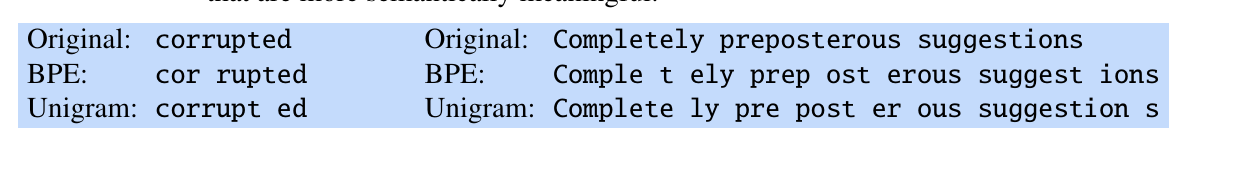

***Creating the Training data***

Đoạn nội dung trên nói về việc tạo dữ liệu huấn luyện cho các mô hình dịch máy bằng cách sử dụng **parallel corpus** (tập văn bản song song), hay còn gọi là **bitext**. Đây là các văn bản chứa nội dung được dịch song song giữa hai hoặc nhiều ngôn ngữ.

Một số lượng lớn các **parallel corpora** hiện có sẵn, bao gồm các dữ liệu từ chính phủ và tổ chức quốc tế. Ví dụ:

- **Europarl corpus**: Được trích xuất từ các biên bản họp của Nghị viện Châu Âu, chứa từ 400,000 đến 2 triệu câu cho mỗi ngôn ngữ trong 21 ngôn ngữ châu Âu.
- **United Nations Parallel Corpus**: Gồm khoảng 10 triệu câu trong sáu ngôn ngữ chính thức của Liên Hợp Quốc (Ả Rập, Trung Quốc, Anh, Pháp, Nga, và Tây Ban Nha).

Ngoài ra, còn có các **parallel corpora** khác được lấy từ phụ đề phim và chương trình truyền hình, như **OpenSubtitles corpus**, và từ các văn bản web chung, như **ParaCrawl corpus** với 223 triệu cặp câu giữa 23 ngôn ngữ EU và tiếng Anh, được trích xuất từ **CommonCrawl**.

 **Sentence alignment**

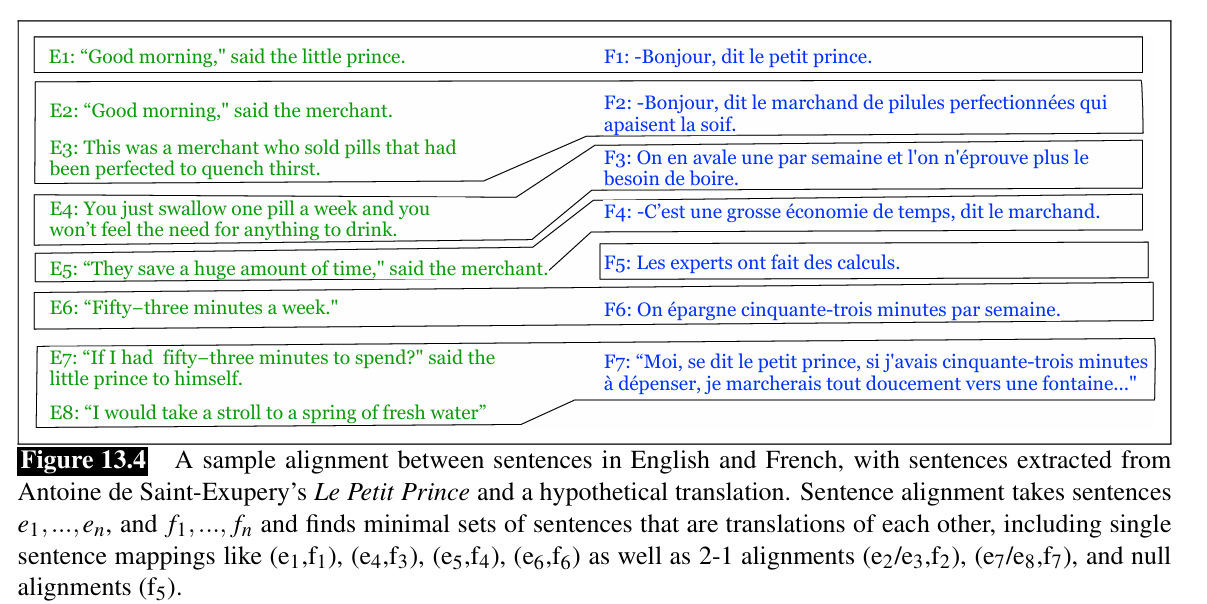

**Căn chỉnh câu giữa hai tài liệu dịch song ngữ**

Khi cần căn chỉnh câu giữa hai tài liệu song ngữ, thường có hai bước chính:

1. **Hàm chi phí**: Hàm này nhận một đoạn câu từ tài liệu nguồn và một đoạn câu từ tài liệu đích, sau đó trả về điểm số để đo lường khả năng cao của việc các đoạn này là bản dịch của nhau.

2. **Thuật toán căn chỉnh**: Dựa vào các điểm số từ hàm chi phí để tìm ra căn chỉnh tốt nhất giữa hai tài liệu.

**Đánh giá độ tương tự của câu giữa các ngôn ngữ**

Để đánh giá sự tương tự của câu giữa các ngôn ngữ, ta cần sử dụng **không gian nhúng đa ngôn ngữ** (multilingual embedding space) – trong đó các câu từ các ngôn ngữ khác nhau được biểu diễn trong cùng một không gian nhúng. Với không gian nhúng này, **độ tương tự cosin** có thể làm hàm đánh giá tự nhiên cho độ giống nhau giữa các câu.

Thompson và Koehn (2019) đã đưa ra hàm chi phí giữa hai đoạn câu \(x, y\) từ tài liệu nguồn và tài liệu đích như sau:

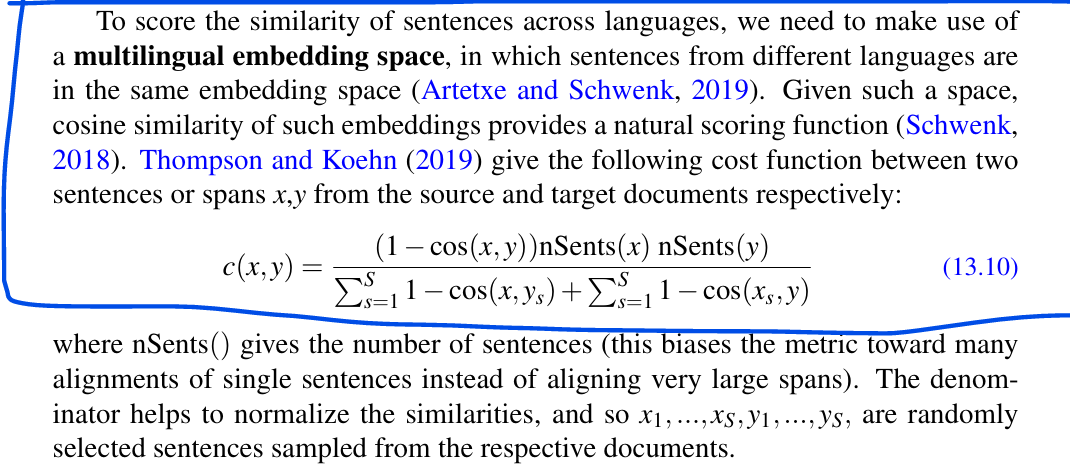

trong đó hàm `nSents()` biểu thị số câu, giúp định hướng việc căn chỉnh các câu đơn lẻ thay vì căn chỉnh các đoạn quá dài. Mẫu câu ngẫu nhiên từ tài liệu nguồn và đích được sử dụng để chuẩn hóa độ tương tự.

**Sử dụng thuật toán căn chỉnh**

Thông thường, **lập trình động** (dynamic programming) được áp dụng như thuật toán căn chỉnh, mở rộng từ thuật toán đo khoảng cách chỉnh sửa (minimum edit distance) đã được giới thiệu.

**Xử lý nhiễu trong tập dữ liệu**

Cuối cùng, cần loại bỏ các cặp câu nhiễu để cải thiện chất lượng của tập dữ liệu căn chỉnh. Có thể áp dụng quy tắc thủ công như loại bỏ các câu quá dài, quá ngắn, hoặc chứa URL khác nhau. Ngoài ra, có thể xếp hạng các cặp câu dựa vào điểm cosin trong không gian nhúng và loại bỏ những cặp có điểm thấp vì chúng có thể không phải là bản dịch chuẩn xác.

## Details of the Encoder-Decoder Model

https://d2l.ai/chapter_recurrent-modern/encoder-decoder.html

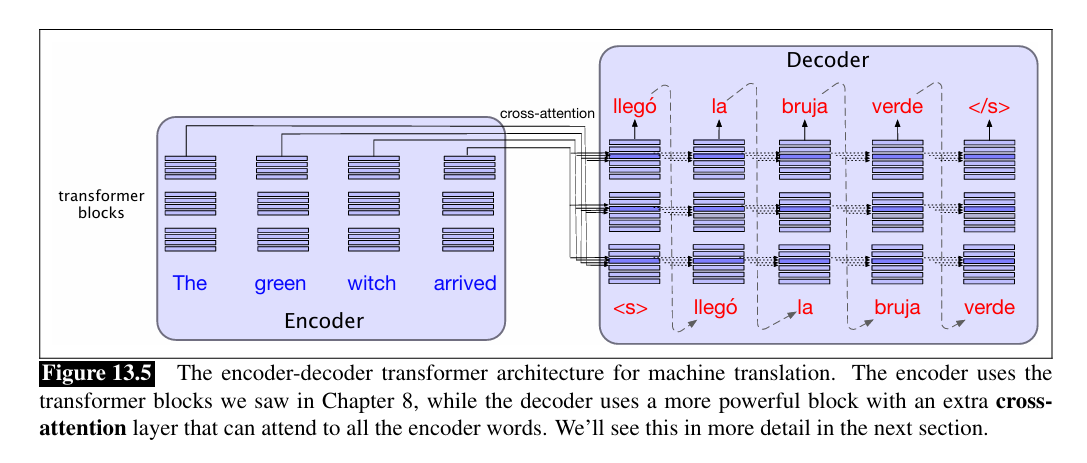

Kiến trúc tiêu chuẩn cho dịch máy (MT) là kiến trúc transformer kiểu mã hóa-giải mã (encoder-decoder). Kiến trúc mã hóa-giải mã đã được giới thiệu trước đây với RNNs trong Chương 8, và phiên bản transformer có cùng ý tưởng. Hình 13.5 minh họa trực quan kiến trúc này ở mức độ cao. Bạn sẽ thấy rằng kiến trúc mã hóa-giải mã được tạo thành từ hai transformer: một encoder, tương tự như các transformer cơ bản từ Chương 9, và một decoder, được tăng cường với một lớp mới đặc biệt gọi là lớp cross-attention. Encoder nhận đầu vào là các token từ ngôn ngữ nguồn $ X = x_1, x_2, \dots, x_n $ và ánh xạ chúng thành một biểu diễn đầu ra $ H_{enc} = h_1, h_2, \dots, h_n $ thông qua một chuỗi các khối encoder.

Decoder về cơ bản là **một mô hình ngôn ngữ có điều kiện**, **tập trung vào biểu diễn từ encoder và tạo ra các từ đích từng bước một**. Tại mỗi thời điểm, nó điều kiện hóa trên câu nguồn và các từ đích đã được tạo ra trước đó để sinh ra một token. Việc giải mã có thể sử dụng bất kỳ phương pháp giải mã nào đã thảo luận trong Chương 9 như greedy, sampling theo nhiệt độ, hoặc nucleus sampling. Tuy nhiên, thuật toán giải mã phổ biến nhất cho MT là beam search, sẽ được giới thiệu trong Mục 13.4.

Các thành phần của kiến trúc này có chút khác biệt so với khối transformer chúng ta đã thấy. Đầu tiên, để tập trung vào ngôn ngữ nguồn, các khối transformer trong decoder có **một lớp cross-attention** bổ sung. Nhớ rằng khối transformer trong Chương 9 bao gồm một lớp tự chú ý (self-attention) nhằm tập trung vào đầu vào từ lớp trước đó, tiếp theo là một lớp chuẩn hóa (layer norm), một lớp feed forward, và thêm một lớp chuẩn hóa nữa. Khối transformer trong decoder bao gồm một lớp đặc biệt với một loại chú ý khác, cross-attention (còn được gọi là chú ý mã hóa-giải mã hoặc chú ý nguồn). **Cross-attention có dạng giống như attention nhiều đầu (multi-head attention)** trong khối transformer thông thường, **ngoại trừ các truy vấn (queries) đến từ lớp trước đó của decoder**, trong khi c**ác khóa (keys) và giá trị (values) đến từ đầu ra của encoder.**

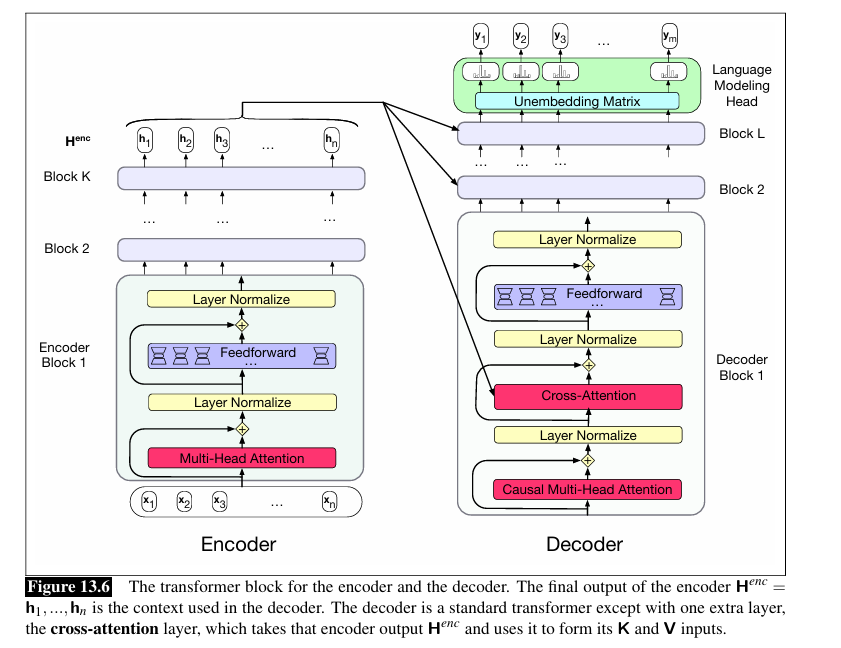

Trong attention nhiều đầu chuẩn, đầu vào của mỗi lớp attention là $ X $. Trong cross-attention, đầu vào là đầu ra cuối cùng của encoder, ký hiệu là $ H_{enc} = h_1, h_2, \dots, h_n $. $ H_{enc} $ có kích thước $[n, d]$, trong đó mỗi hàng biểu diễn một token đầu vào. Để liên kết các keys và values từ encoder với query từ lớp trước của decoder, ta nhân đầu ra $ H_{enc} $ của encoder với trọng số key $ W_K $ và trọng số value $ W_V $ của lớp cross-attention. Query **đến từ đầu ra của lớp decoder trước đó (Tức là đầu ra của layer causal Mutil-Head Attention trọng một block Decoder bất kỳ)** $ H_{dec}^{[l-1]} $, được nhân với trọng số query $ W_Q $ của lớp cross-attention:

$$
Q = H_{dec}^{[l-1]} W_Q; \quad K = H_{enc} W_K; \quad V = H_{enc} W_V
\$$


$$
\text{CrossAttention}(Q, K, V) = \text{softmax}\left(\frac{Q K^\top}{\sqrt{d_k}}\right)
$$

Cross-attention cho phép decoder tập trung vào từng từ của ngôn ngữ nguồn như được biểu diễn trong toàn bộ biểu diễn đầu ra cuối cùng của encoder. Lớp attention khác trong mỗi khối decoder là lớp attention nhiều đầu, là attention kiểu nhân quả (còn gọi là left-to-right) mà chúng ta đã thấy ở Chương 9. Tuy nhiên, attention nhiều đầu trong encoder được phép quan sát toàn bộ văn bản ngôn ngữ nguồn, do đó nó không bị che (masking).

Để huấn luyện mô hình mã hóa-giải mã, ta sử dụng cùng phương pháp tự giám sát (self-supervision) như đã dùng cho RNN mã hóa-giải mã trong Chương 8. Mạng được cung cấp văn bản nguồn, và bắt đầu với token phân tách, được huấn luyện autoregressively để dự đoán token tiếp theo bằng cross-entropy loss. Nhớ rằng cross-entropy loss trong mô hình ngôn ngữ được xác định bởi xác suất mà mô hình gán cho từ tiếp theo đúng. Tại thời điểm $ t $, cross-entropy loss là log âm của xác suất mà mô hình gán cho từ tiếp theo trong chuỗi huấn luyện:

$$
L_{CE}(\hat{y}_t, y_t) = -\log \hat{y}_t[w_{t+1}]
$$

Trong trường hợp này, chúng ta sử dụng teacher forcing trong decoder. Nhớ rằng trong teacher forcing, tại mỗi bước thời gian trong quá trình giải mã, ta buộc hệ thống phải sử dụng token mục tiêu chính xác từ huấn luyện làm đầu vào tiếp theo $ x_{t+1} $, thay vì để nó dựa vào đầu ra có thể sai $ \hat{y}_t $ của decoder.

## Decoding in MT: Beam Search

https://medium.com/@tuyen66tst/minimum-bayes-risk-decoding-for-machine-translate-3166ebeb27c4

source code : https://github.com/naist-nlp/mbrs

In [ ]:
!pip install mbrs

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.8/51.8 kB 1.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.2/33.2 MB 4.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.4/13.4 MB 50.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.5/55.5 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 74.6/74.6 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 104.0/104.0 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.1/93.1 kB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.4/101.4 kB 6.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 583.2/583.2 kB 27.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 581.7/581.7 kB 26.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 18.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [ ]:
from mbrs.metrics import MetricCOMET
from mbrs.decoders import DecoderMBR

SOURCE = "ありがとう"
HYPOTHESES = ["Thanks", "Thank you", "Thank you so much", "Thank you.", "thank you"]

# Setup COMET.
metric_cfg = MetricCOMET.Config(
  model="Unbabel/wmt22-comet-da",
  batch_size=64,
  fp16=True,
)
metric = MetricCOMET(metric_cfg)

# Setup MBR decoding.
decoder_cfg = DecoderMBR.Config()
decoder = DecoderMBR(decoder_cfg, metric)

# Decode by COMET-MBR.
# This example regards the hypotheses themselves as the pseudo-references.
# Args: (hypotheses, pseudo-references, source)
output = decoder.decode(HYPOTHESES, HYPOTHESES, source=SOURCE, nbest=1)

print(f"Selected index: {output.idx}")
print(f"Output sentence: {output.sentence}")
print(f"Expected score: {output.score}")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Fetching 5 files:   0%|          | 0/5 [00:00<?, ?it/s]

.gitattributes:   0%|          | 0.00/1.48k [00:00<?, ?B/s]

LICENSE:   0%|          | 0.00/9.69k [00:00<?, ?B/s]

model.ckpt:   0%|          | 0.00/2.32G [00:00<?, ?B/s]

hparams.yaml:   0%|          | 0.00/567 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/3.53k [00:00<?, ?B/s]

INFO:pytorch_lightning.utilities.migration.utils:Lightning automatically upgraded your loaded checkpoint from v1.8.3.post1 to v2.4.0. To apply the upgrade to your files permanently, run `python -m pytorch_lightning.utilities.upgrade_checkpoint ../root/.cache/huggingface/hub/models--Unbabel--wmt22-comet-da/snapshots/371e9839ca4e213dde891b066cf3080f75ec7e72/checkpoints/model.ckpt`


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

sentencepiece.bpe.model:   0%|          | 0.00/5.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.10M [00:00<?, ?B/s]

config.json:   0%|          | 0.00/616 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/pytorch_lightning/core/saving.py:195: Found keys that are not in the model state dict but in the checkpoint: ['encoder.model.embeddings.position_ids']


Selected index: [3]
Output sentence: ['Thank you.']
Expected score: [0.9371062517166138]


## Translating in low-resource situations

**The most common data augmentation technique** for machine translation is called **[backtranslation](https://medium.com/towards-artificial-intelligence/back-translation-in-text-augmentation-by-nlpaug-d65518dd092f)**. Backtranslation relies on the intuition that while parallel corpora may be limited for particular languages or domains, we can often find a large (or at least larger) monolingual corpus, to add to the smaller parallel corpora that are available. The algorithm makes use of monolingual corpora in the target language by creating synthetic bitexts.

Kỹ thuật tăng cường dữ liệu phổ biến nhất cho dịch máy được gọi là dịch ngược. Dịch ngược dựa trên trực giác rằng trong khi kho ngữ liệu song song có thể bị hạn chế đối với các ngôn ngữ hoặc miền cụ thể, chúng ta thường có thể tìm thấy một kho ngữ liệu đơn ngữ lớn (hoặc ít nhất là lớn hơn), **để thêm vào kho ngữ liệu song song nhỏ hơn hiện có**. Thuật toán sử dụng ngữ liệu đơn ngữ trong ngôn ngữ đích bằng cách tạo ra các văn bản bit tổng hợp.


In [ ]:
!pip install nlpaug

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 410.5/410.5 kB 5.8 MB/s eta 0:00:00


syntax : nlpaug.augmenter.word.back_translation.BackTranslationAug(from_model_name='facebook/wmt19-en-de', to_model_name='facebook/wmt19-de-en', name='BackTranslationAug', device='cpu', batch_size=32, max_length=300, force_reload=False, verbose=0)

In [ ]:
!pip install sacremoses

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 897.5/897.5 kB 9.5 MB/s eta 0:00:00


In [ ]:
import nlpaug.augmenter.word as naw

text = 'The quick brown fox jumped over the lazy dog'
back_trans_aug = naw.BackTranslationAug()
text_chunk_aug_btrans = back_trans_aug.augment(text)
print(text_chunk_aug_btrans)

Some weights of FSMTForConditionalGeneration were not initialized from the model checkpoint at facebook/wmt19-en-de and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Some weights of FSMTForConditionalGeneration were not initialized from the model checkpoint at facebook/wmt19-de-en and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github

tokenizer_config.json:   0%|          | 0.00/67.0 [00:00<?, ?B/s]

vocab-src.json:   0%|          | 0.00/849k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/315k [00:00<?, ?B/s]

['The speedy brown fox leapt over the lazy dog']


see more code : https://github.com/vietai/dab if want build model for private

## MTEvaluation

 Translations are evaluated along two dimensions:
 adequacy
 f
 luency
 1. adequacy: how well the translation captures the exact meaning of the source
 sentence. Sometimes called faithfulness or fidelity. (As ChF, Bleu)

 2. fluency: howfluentthetranslation is in the target language (is it grammatical,
 clear, readable, natural). (As score BERT,...)  

See more : Chapter 13.6 MTEvaluation in BOOK

## Summary

 Machine translation is one of the most widely used applications of NLP, and the
 encoder-decoder model, first developed for MT is a key tool that has applications
 throughout NLP.

 • Languageshavedivergences, bothstructural and lexical, that make translation
 difficult.

 • The linguistic field of typology investigates some of these differences; lan
guages can be classified by their position along typological dimensions like
 whether verbs precede their objects.

 • Encoder-decoder networks (for transformers just as we saw in Chapter 8 for
 RNNs) are composed of an encoder network that takes an input sequence
 and creates a contextualized representation of it, the context. This context
 representation is then passed to a decoder which generates a task-specific
 output sequence.

 • **Cross-attention** allows the transformer decoder to view information from all
 the hidden states of the encoder.

 • Machinetranslation models are trained on aparallel corpus, sometimes called
 a bitext, a text that appears in two (or more) languages.


# QuestionAnswering, Information Retrieval, and Retrieval Augmented Generation

## Information Retrieval

Question answering systems often focus on a useful subset of information needs:
 **factoid questions**, questions of fact or reasoning that can be answered with simple
 facts expressed in short or medium-length texts,

 The first and main problem is that large language models often give the wrong
 answer! Large language models **hallucinate**. A hallucination is a response that is
 not faithful to the facts of the world. That is, when asked questions, large language
 models simply make up answers that sound reasonable (Đó là, khi được đặt câu hỏi, các mô hình ngôn ngữ lớn chỉ đơn giản là tạo ra câu trả lời nghe có vẻ hợp lý). For example, Dahl et al.
 (2024) **bold text** found that when **asked questions about the legal domain** (like about particular
 legal cases), large language models **hallucinated from 69% to 88%** of the time!

 And it’s not always possible to tell when language models are hallucinating,
 partly because LLMs aren’t well-**calibrated**. In a **[calibrated](https://aclanthology.org/2024.acl-long.198.pdf)** system, the confidence
 of a system in the correctness of its answer is highly correlated with the probability
 of an answer being correct. So if a calibrated system is wrong, at least it might hedge
 its answer or tell us to go check another source. But since language models are not
 well-calibrated, they often give a very wrong answer with complete certainty (Zhou
 et al., 2024).

Và không phải lúc nào chúng ta cũng có thể biết được khi nào các mô hình ngôn ngữ tạo ra thông tin sai lệch, một phần là do chúng không được hiệu chỉnh tốt. Trong một hệ thống được hiệu chỉnh, mức độ tự tin của hệ thống về độ chính xác của câu trả lời sẽ có tương quan chặt chẽ với xác suất câu trả lời đó đúng. Do đó, nếu **một hệ thống được hiệu chỉnh trả lời sai**, ít nhất nó có thể đưa ra một **câu trả lời dè dặt hoặc khuyến khích chúng ta kiểm tra lại từ nguồn khác**. Nhưng vì các **mô hình ngôn ngữ không được hiệu chỉnh tốt**, chúng thường đưa ra câu **trả lời rất sai với sự tự tin tuyệt đối** (Zhou et al., 2024).

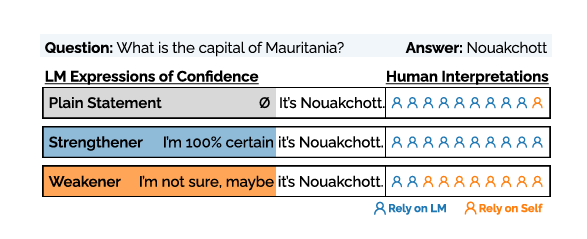

LLMs with well calibrated trả lời nó sẽ có câu hỏi theo mức độ hơn..

Còn LLMs not with calibrated trả lời tự tin tuyết đối nhưng không có cơ sở

 For this reason the most common way to do question-answering with LLMs is
 retrieval-augmented generation or RAG, and that is the method we will focus on
 in this chapter. In RAG we use information retrieval (IR) techniques to retrieve
 documents that are likely to have information that might help answer the question.
 Then we use a large language model to generate an answer given these documents dịch nội dung

Các mô hình ngôn ngữ lớn (LLMs) chỉ bằng cách gợi ý (prompting) không đủ để truy xuất thông tin từ dữ liệu độc quyền, như email cá nhân, hồ sơ y tế, hoặc tài liệu nội bộ của công ty. Ngoài ra, các LLM tĩnh cũng không thể trả lời các câu hỏi về thông tin cập nhật gần đây. Do đó, phương pháp phổ biến cho hỏi-đáp với LLM là **tạo sinh tăng cường truy xuất** (RAG), trong đó kết hợp kỹ thuật truy xuất thông tin để lấy tài liệu liên quan, sau đó dùng mô hình ngôn ngữ lớn để tạo ra câu trả lời từ các tài liệu đó.

Dựa câu trả lời vào các tài liệu được truy xuất có thể giải quyết một số vấn đề khi chỉ dùng lệnh nhắc (prompting) đơn giản để trả lời câu hỏi. Trước hết, nó giúp đảm bảo rằng câu trả lời dựa trên **các sự thật từ một tập dữ liệu đã được kiểm chứng**. Hệ thống có thể cung cấp **câu trả lời kèm theo ngữ cảnh của đoạn văn hoặc tài liệu mà câu trả lời xuất phát(lấy) từ đó**, giúp người dùng tin tưởng hơn vào độ chính xác của câu trả lời (hoặc dễ phát hiện khi nó sai!). **Những kỹ thuật truy xuất này có thể áp dụng trên bất kỳ dữ liệu độc quyền nào, như dữ liệu pháp lý hoặc y tế cho các ứng dụng đó**.

Chúng ta sẽ bắt đầu bằng việc giới thiệu về truy xuất thông tin **– nhiệm vụ chọn ra tài liệu phù hợp nhất từ một tập hợp tài liệu dựa trên truy vấn của người dùng thể hiện nhu cầu thông tin**. Ta sẽ xem xét **phương pháp cổ điển dựa trên cosin của các vector tf-idf thưa**, và **các bộ truy xuất ‘neuron’ hiện đại đại diện cho truy vấn và tài liệu bằng cách sử dụng BERT **hoặc các mô hình ngôn ngữ khác. Sau đó,** chúng ta sẽ giới thiệu phương pháp hỏi-đáp dựa trên truy xuất và mô hình tạo sinh tăng cường truy xuất.**

Cuối cùng, chúng ta sẽ thảo luận về các bộ dữ liệu hỏi-đáp khác nhau. **Những bộ dữ liệu này được sử dụng để tinh chỉnh các mô hình ngôn ngữ lớn trong quá trình tinh chỉnh hướng dẫn**, như đã thấy ở Chương 12. Chúng cũng được sử dụng làm thước đo, vì hỏi-đáp đóng vai trò quan trọng như một thước đo để **đánh giá khả năng của các mô hình ngôn ngữ.**

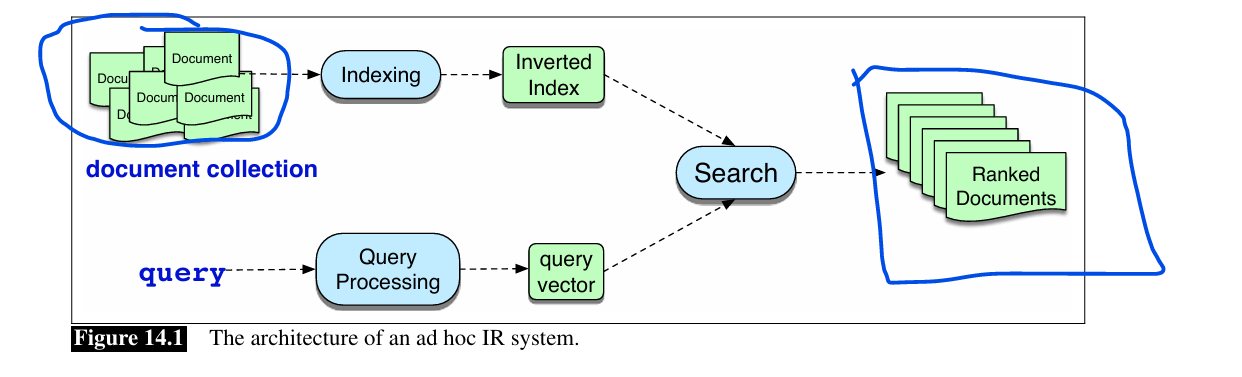

The basic IR architecture uses the vector space model we introduced in Chap
ter 6, in which we map queries and document to vectors based on unigram word
 counts, and use the cosine similarity between the vectors to rank potential documents
 (Salton, 1971). This is thus an example of the bag-of-words model introduced in
 Chapter 4, since words are considered independently of their positions **(Do đó, đây là một ví dụ về mô hình túi từ được giới thiệu trong Chương 4, vì các từ được coi là độc lập với vị trí của chúng)**

Nhiệm vụ IR mà chúng tôi xem xét được gọi là truy xuất ad hoc, trong đó người dùng đưa ra một truy vấn cho hệ thống truy xuất, sau đó hệ thống sẽ trả về một tập hợp tài liệu được sắp xếp từ một bộ sưu tập nhất định. Một tài liệu(document) có thể là bất kỳ đơn vị văn bản nào mà hệ thống lập chỉ mục và truy xuất (trang web, bài báo khoa học, tin tức hoặc thậm chí các đoạn ngắn như đoạn văn). Một bộ sưu tập (**document collection**) là một tập hợp các tài liệu(**document**) được sử dụng để đáp ứng yêu cầu của người dùng. Một thuật ngữ (**term**) là một từ trong bộ sưu tập (**document collection)**, nhưng cũng có thể bao gồm các cụm từ. Cuối cùng, truy vấn (query) thể hiện nhu cầu thông tin của người dùng được biểu đạt dưới dạng **một tập hợp các thuật ngữ(term)**. Kiến trúc cấp cao của một công cụ truy xuất ad hoc được minh họa trong Hình 14.1.

**Term weighting and document scoring**

 Let’s look at the details of how the match **between a document and query** is scored.
 Wedon’t use raw word counts in IR, instead **computing a term weight** for each
 **document word**. Two term weighting **schemes are common**: the **tf-idf weighting**
 introduced in Chapter 6, and a slightly more powerful variant called **BM25**.

the term frequency **tf** and the inverse document frequency **idf**.

The **term frequency** tells us how frequent the word is; words that occur more
 often in a document are likely to be informative about the document’s contents. (**Thuật ngữ tần suất** cho chúng ta biết tần suất của từ này; Các **từ xuất hiện thường xuyên hơn trong một tài liệu** có khả năng là thông tin về nội dung của tài liệu.)

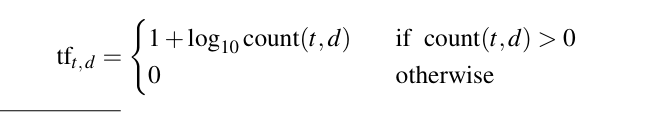

 The **document frequency** dft of a term t is the number of documents it oc
curs in. Terms that occur in only a few documents are useful for discriminating
 those documents from the rest of the collection; terms that occur across the entire collection aren’t as helpful. The **inverse document frequency** or idf term weight (Sparck Jones, 1972) is defined as:

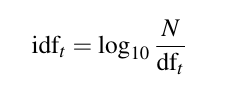

where **N is the total number of documents in the collection**, and **dft is the number of documents in which term t occurs**. The fewer documents in which a term occurs, the higher this weight; the lowest weight of 0 is assigned to terms that occur in every
 document.

**Document Scoring**

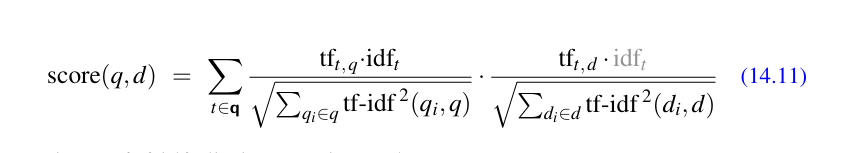

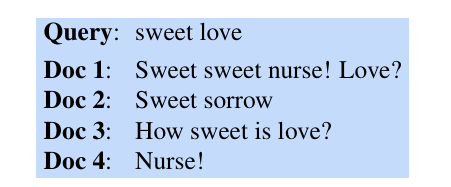

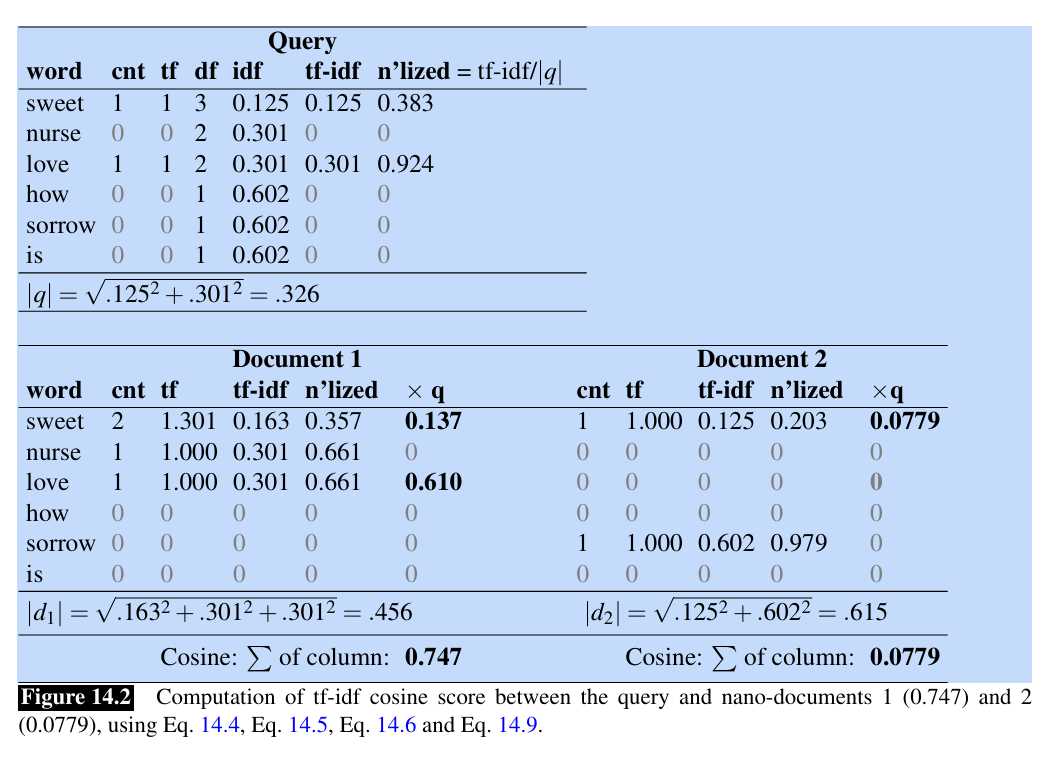

 **BM25 score**

Một biến thể phức tạp hơn trong họ tf-idf là phương pháp trọng số BM25 (đôi khi còn được gọi là Okapi BM25 theo hệ thống thông tin Okapi, nơi mà nó được giới thiệu lần đầu (Robertson và cộng sự, 1995)). BM25 thêm vào hai tham số: $ k $, một tham số điều chỉnh cân bằng giữa tần số từ (term frequency) và IDF, và $ b $, tham số điều chỉnh tầm quan trọng của việc chuẩn hóa theo độ dài tài liệu. Điểm số BM25 của một tài liệu $ d $ đối với một truy vấn $ q $ được tính như sau:

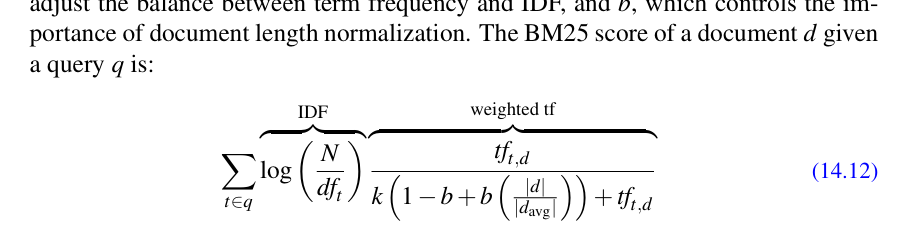

idf : IDF đo lường tầm quan trọng của một thuật ngữ trong toàn bộ kho ngữ liệu. Nó gán trọng số cao hơn cho các thuật ngữ hiếm trong kho ngữ liệu và trọng số thấp hơn cho các thuật ngữ phổ biến. IDF được tính bằng công thức: IDF = log((N — n + 0,5) / (n + 0,5)), trong đó N là tổng số tài liệu và n là số lượng tài liệu có chứa thuật ngữ.

tf : TF đề cập đến số lần một thuật ngữ cụ thể xuất hiện trong tài liệu. Tuy nhiên, BM25 sử dụng tần số thuật ngữ được sửa đổi có tính đến hiệu ứng bão hòa để tránh nhấn mạnh quá mức các thuật ngữ lặp đi lặp lại nhiều

cụ thể là số lần suất hiện term (chữ số ) trong tài liệu document (tức là một tài liệu )

Thành phần k : BM25 cũng bao gồm chức năng bão hòa thuật ngữ để giảm thiểu tác động của tần số thuật ngữ quá cao. Chức năng này làm giảm ảnh hưởng của tần số thuật ngữ cực cao đến việc tính điểm mức độ liên quan, vì tần số rất cao thường tương ứng với các thuật ngữ ít thông tin hơn.

Thành phần b : Bão hòa thuật ngữ truy vấn: BM25 cũng bao gồm chức năng bão hòa thuật ngữ để giảm thiểu tác động của tần số thuật ngữ quá cao. Chức năng này làm giảm ảnh hưởng của tần số thuật ngữ cực cao đến việc tính điểm mức độ liên quan, vì tần số rất cao thường tương ứng với các thuật ngữ ít thông tin hơn.

Trong công thức BM25, $ d_{avg} $ là độ dài trung bình của các tài liệu. Khi $ k = 0 $, BM25 sẽ bỏ qua tần số từ, chỉ sử dụng việc lựa chọn nhị phân của các từ có trong truy vấn (cộng với idf). Một giá trị $ k $ lớn sẽ đưa BM25 về gần với tần số từ thô (cộng với idf). Tham số $ b $ có giá trị từ 1 **(sử dụng độ dài tài liệu để điều chỉnh) đến 0 (không điều chỉnh theo độ dài)**. Manning và cộng sự (2008) gợi ý các giá trị hợp lý cho $ k $ nằm trong khoảng [1.2, 2] và $ b = 0.75 $. Kamphuis và cộng sự (2020) cung cấp một bản tóm tắt hữu ích về nhiều biến thể nhỏ khác của BM25. [variant BM25](https://repository.ubn.ru.nl/bitstream/handle/2066/219374/219374.pdf?sequence=3)

Trong quá khứ, người ta thường **loại bỏ các từ có tần suất xuất hiện cao khỏi cả truy vấn và tài liệu trước khi tiến hành biểu diễn chúng**. Danh sách những từ có tần suất cao cần loại bỏ được gọi là **stop list** (danh sách dừng). **Ý tưởng đằng sau việc này là các từ có tần suất cao (thường là các từ chức năng như "the," "a," "to") mang ít giá trị ngữ nghĩa và có thể không giúp ích** trong việc truy xuất thông tin. Ngoài ra, điều này cũng giúp giảm kích thước của các tệp chỉ mục ngược.

**Tuy nhiên, điểm bất lợi của việc sử dụng stop list là nó làm cho việc tìm kiếm các cụm từ có chứa từ trong danh sách dừng trở nên khó khăn.** Ví dụ, các danh sách dừng phổ biến có thể rút ngắn cụm từ “to be or not to be” thành cụm từ “not.” Trong các hệ thống truy xuất thông tin hiện đại, việc sử dụng stop list ít phổ biến hơn, một phần do hiệu suất đã được cải thiện và một phần vì chức năng của nó **phần lớn đã được xử lý bởi phương pháp** **IDF** (Inverse Document Frequency), giúp giảm trọng số của các từ chức năng xuất hiện trong mọi tài liệu.

Tuy nhiên, **việc loại bỏ stop words đôi khi vẫn có ích trong các nhiệm vụ xử lý ngôn ngữ tự nhiên khác**, vì vậy nên ghi nhớ kỹ thuật này.

**Giải thích lý do tại sao điểm số BM25 không nằm trong khoảng 0 và 1**

BM25 (Best Matching 25) là một mô hình truy xuất thông tin dựa trên xác suất, nhưng điểm số của nó không phải là xác suất theo nghĩa truyền thống. Điểm số BM25 là các điểm xếp hạng mức độ liên quan của tài liệu với truy vấn, không phải xác suất, và vì vậy chúng có thể nằm ở bất kỳ giá trị dương nào.

**Hiểu về điểm số BM25**

BM25 là hàm xếp hạng dùng trong truy xuất thông tin để ước lượng mức độ liên quan của tài liệu với truy vấn tìm kiếm. Điểm số BM25 phụ thuộc vào một số yếu tố:

- **Tần suất từ (TF):** Số lần một từ xuất hiện trong tài liệu.
- **Trọng số nghịch tài liệu (IDF):** Đo lường tầm quan trọng của từ trong toàn bộ tập tài liệu. Các từ phổ biến ở nhiều tài liệu sẽ có trọng số thấp, trong khi các từ hiếm sẽ có trọng số cao.
- **Chuẩn hóa độ dài tài liệu:** Điều chỉnh để tránh thiên vị tài liệu dài hơn.

**Lý do điểm số BM25 không nằm trong khoảng 0 và 1**

- **Bản chất của điểm số liên quan:** BM25 được thiết kế để xếp hạng tài liệu theo mức độ liên quan chứ không phải tạo ra xác suất. Do đó, điểm số phản ánh mức độ liên quan dựa trên tần suất từ, độ dài tài liệu và tầm quan trọng của từ, dẫn đến phạm vi điểm số rộng.
- **Thành phần IDF:** IDF có thể thay đổi lớn, các từ hiếm trong tập tài liệu sẽ có giá trị IDF cao, làm cho điểm BM25 cao hơn.
- **Tần suất từ:** Khi từ truy vấn xuất hiện nhiều lần trong tài liệu, tử số trong công thức BM25 trở nên lớn, tăng điểm số.

**Kết luận**

BM25 là hàm truy xuất mạnh mẽ, cân bằng giữa tần suất từ, chuẩn hóa độ dài tài liệu và trọng số nghịch tài liệu. Điểm số của BM25 dùng để xếp hạng mức độ liên quan của tài liệu thay vì biểu diễn xác suất, vì thế không bị giới hạn trong khoảng 0 và 1.

**Trong lĩnh vực truy xuất thông tin**, các công cụ tìm kiếm đóng vai trò quan trọng trong việc giúp người dùng tìm kiếm thông tin liên quan từ khối lượng dữ liệu khổng lồ. Hiệu quả và tính chính xác của các công cụ tìm kiếm phụ thuộc nhiều vào các thuật toán xếp hạng. **Một trong những thuật toán đã thu hút nhiều sự chú ý và thành công là thuật toán xếp hạng BM25 (Best Match 25)**. **BM25 là một mô hình xếp hạng dựa trên từ khóa, nhằm cung cấp các kết quả tìm kiếm chính xác và liên quan bằng cách tính điểm tài liệu dựa trên tần suất từ và độ dài tài liệu**. Bài viết này khám phá các khái niệm cơ bản và nguyên lý hoạt động của thuật toán xếp hạng BM25.

**Ưu và nhược điểm của BM25**

**Ưu điểm**
- BM25 là một thuật toán xếp hạng được sử dụng rộng rãi nhờ tính đơn giản và hiệu quả trong việc tạo ra các kết quả tìm kiếm phù hợp.
- Thuật toán này tính đến cả tần suất từ và chuẩn hóa độ dài tài liệu, giúp khắc phục hiện tượng thiên vị tài liệu dài.
- BM25 có thể xử lý các bộ sưu tập tài liệu lớn một cách hiệu quả, làm cho nó có khả năng mở rộng cho các tình huống tìm kiếm thực tế.

**Nhược điểm**
- BM25 không xem xét ý nghĩa ngữ nghĩa hoặc ngữ cảnh của truy vấn và tài liệu, có thể dẫn đến xếp hạng không tối ưu cho một số loại truy vấn.
- Thuật toán giả định rằng các từ trong truy vấn độc lập về mặt thống kê, điều này có thể không đúng trong trường hợp các từ có phụ thuộc lẫn nhau.
- Thuật toán phụ thuộc nhiều vào tần suất từ và độ dài tài liệu, có thể bỏ qua các yếu tố quan trọng khác như cấu trúc tài liệu và phản hồi về độ liên quan.

**Kết luận**
Thuật toán xếp hạng BM25 đã góp phần đáng kể vào việc cải thiện hiệu suất của các công cụ tìm kiếm bằng cách xét đến tần suất từ, trọng số nghịch tài liệu, và chuẩn hóa độ dài tài liệu. Mặc dù BM25 đã trở thành tiêu chuẩn trong lĩnh vực này, nhưng nó vẫn còn những hạn chế. Nghiên cứu và phát triển trong tương lai có thể giải quyết các hạn chế này bằng cách kết hợp các kỹ thuật phức tạp hơn, như học máy và xử lý ngôn ngữ tự nhiên, nhằm tăng cường mức độ liên quan và độ chính xác của kết quả tìm kiếm. Tuy vậy, BM25 vẫn là một cột mốc quan trọng trong sự phát triển của truy xuất thông tin và là nền tảng cho các tiến bộ tiếp theo trong công nghệ công cụ tìm kiếm.

Coding TF-IDF and BM25

In [ ]:
from collections import Counter

documents = [
    ['apple', 'banana', 'orange', 'apple'],
    ['banana', 'orange', 'orange'],
    ['apple', 'apple', 'banana', 'banana'],
    ['orange', 'orange', 'banana']
]
def calculate_term_counts(documents): # tf
  term_counts = Counter()
  for document in documents:
    term_counts.update(set(document))
  return term_counts
term = calculate_term_counts(documents)
term


0

In [ ]:
document = documents[0]
1 + math.log10(document.count('apple')) if document.count('apple') > 0 else 0

1.3010299956639813

In [ ]:
import math
from collections import Counter
d1 = []
d2= []
class IF_IDF:
  def __init__(self, documents):
    self.documents = documents
    self.N = len(documents)
    self.term_counts = self.document_frenquency()

  def document_frenquency(self): # df
    term_counts = Counter()
    for document in self.documents:
      term_counts.update(set(document))
    return term_counts

  def inverse_document_frequency(self, term): # idf
    dft = self.term_counts[term] # dft
    return math.log10(self.N/int(dft)) if dft > 0 else 0

  def term_frequency(self, term, document): #tf
    return 1 + math.log10(document.count(term)) if document.count(term) > 0 else 0

  def tf_idf(self, term, document):
    # print(self.term_frequency(term, document))
#     print(self.inverse_document_frequency(term))
    # print(self.term_frequency(term, document) * self.inverse_document_frequency(term))
    return self.term_frequency(term, document) * self.inverse_document_frequency(term)

  def calculate_TF_IDF_Score(self, query, document):
    print(query)
    score = 0.0
    tf_idfd = 0.0
    tf_idfq = 0.0
    # f = []
    for d in set(document):
      # d1.append(self.tf_idf(d, document))
      tf_idfd += self.tf_idf(d, document)**2
    # print('------')
    d1.append(tf_idfd**0.5)
    # print(tf_idfd**0.5)
    for t in query:
        tf_idfq += self.tf_idf(t, query)**2
        # print(tf_idfq)
        score += self.tf_idf(t, query)*self.tf_idf(t, document)
    d2.append(tf_idfq**0.5)
    # print('----')
    # print(tf_idfq**0.5)
    score = score/((tf_idfq**0.5)*(tf_idfd**0.5))
    return score

  def rank_documents(self, query):
      document_scores = []
      for document in self.documents:
          score = self.calculate_TF_IDF_Score(query, document)
          document_scores.append((document, score))

      ranked_documents = sorted(document_scores, key=lambda x: x[1], reverse=True)
      return ranked_documents

In [ ]:
# # Example usage:
# documents = [
#     ['apple', 'banana', 'orange', 'apple'],
#     ['banana', 'orange', 'orange'],
#     ['apple', 'apple', 'banana', 'banana'],
#     ['orange', 'orange', 'banana']
# ]

documents = ["Sweet sweet nurse! Love?","Sweet sorrow", "How sweet is love?","Nurse!"]
documents = [document.replace('!', '').replace('?', '').lower().split(' ') for document in documents]

print(documents)
tf_idf = IF_IDF(documents)
query = ['sweet', 'love']
ranked_documents = tf_idf.rank_documents(query)

for document, score in ranked_documents:
    print(f"Document: {document}, Score: {score}")

[['sweet', 'sweet', 'nurse', 'love'], ['sweet', 'sorrow'], ['how', 'sweet', 'is', 'love'], ['nurse']]
['sweet', 'love']
['sweet', 'love']
['sweet', 'love']
['sweet', 'love']
Document: ['sweet', 'sweet', 'nurse', 'love'], Score: 0.74686542115223
Document: ['how', 'sweet', 'is', 'love'], Score: 0.35749763139121166
Document: ['sweet', 'sorrow'], Score: 0.07788932485528881
Document: ['nurse'], Score: 0.0


In [ ]:
import math
from collections import Counter
d1 = []
d2= []
class BM_25:
  def __init__(self, documents):
    self.documents = documents
    self.N = len(documents)
    self.term_counts = self.document_frenquency()
    self.avg_document_length = sum(len(doc) for doc in documents) / self.N
    self.k = 1.2
    self.b = 0.75

  def document_frenquency(self): # df
    term_counts = Counter()
    for document in self.documents:
      term_counts.update(set(document))
    return term_counts

  def inverse_document_frequency(self, term): # idf
    dft = self.term_counts[term] # dft
    return math.log((self.N - dft + 0.5) / (dft + 0.5))

  def term_frequency(self, term, document): #tf
    return 1 + math.log10(document.count(term)) if document.count(term) > 0 else 0

  def BM25_score(self, query, document):
    score = 0.0
    query_terms = Counter(query)
    for t in query_terms:
        a = (self.k*(1 - self.b + self.b*(len(document)/self.avg_document_length)) + self.term_frequency(t, document))
        score += (self.inverse_document_frequency(t)*self.term_frequency(t, document))* (self.k + 1)/a
    return score

  def rank_documents(self, query):
      document_scores = []
      for document in self.documents:
          score = self.BM25_score(query, document)
          document_scores.append((document, score))

      ranked_documents = sorted(document_scores, key=lambda x: x[1], reverse=True)
      return ranked_documents

In [ ]:
# # Example usage:
documents = [
    ['apple', 'banana', 'orange', 'apple'],
    ['banana', 'orange', 'orange'],
    ['apple', 'apple', 'banana', 'banana'],
    ['orange', 'orange', 'banana']
]
query = ['apple', 'banana']

# documents = ["Sweet sweet nurse! Love?","Sweet sorrow", "How sweet is love?","Nurse!"]
# documents = [document.replace('!', '').replace('?', '').lower().split(' ') for document in documents]

print(documents)
bm25 = BM_25(documents)
# query = ['sweet', 'love']
ranked_documents = bm25.rank_documents(query)

for document, score in ranked_documents:
    print(f"Document: {document}, Score: {score}")

[['apple', 'banana', 'orange', 'apple'], ['banana', 'orange', 'orange'], ['apple', 'apple', 'banana', 'banana'], ['orange', 'orange', 'banana']]
Document: ['apple', 'banana', 'orange', 'apple'], Score: -2.075905428894343
Document: ['banana', 'orange', 'orange'], Score: -2.3336040338605373
Document: ['orange', 'orange', 'banana'], Score: -2.3336040338605373
Document: ['apple', 'apple', 'banana', 'banana'], Score: -3.6765222482682525


In [ ]:
import math
from collections import Counter, defaultdict

class BM25:
    def __init__(self, documents):
        self.documents = documents
        self.document_count = len(documents)
        self.avg_document_length = sum(len(doc) for doc in documents) / self.document_count
        self.doc_freq = self.document_frenquency()
        self.k1 = 1.2
        self.b = 0.75

    def document_frenquency(self): # df
      term_counts = Counter()
      for document in self.documents:
        term_counts.update(set(document))
      return term_counts

    def calculate_idf(self, term):
        """
        Calculates the Inverse Document Frequency (IDF) for a given term.
        """
        document_with_term_count = self.doc_freq.get(term, 0)
        if document_with_term_count == 0:
            return 0
        return math.log((self.document_count - document_with_term_count + 0.5) / (document_with_term_count + 0.5) + 1)

    def calculate_bm25_score(self, query, document):
        """
        Calculates the BM25 score for a single document given a query.
        """
        score = 0.0
        document_length = len(document)
        query_terms = Counter(query)

        for term in query_terms:
            idf = self.calculate_idf(term)
            term_frequency = document.count(term)
            if term_frequency == 0:
                continue
            numerator = term_frequency * (self.k1 + 1)
            denominator = term_frequency + self.k1 * (1 - self.b + self.b * (document_length / self.avg_document_length))
            score += idf * (numerator / denominator)

        return score

    def rank_documents(self, query):
        """
        Ranks all documents based on their BM25 score for a given query.
        """
        document_scores = []
        for document in self.documents:
            score = self.calculate_bm25_score(query, document)
            document_scores.append((document, score))

        ranked_documents = sorted(document_scores, key=lambda x: x[1], reverse=True)
        return ranked_documents


# Example usage:
documents = [
    ['apple', 'banana', 'orange', 'apple'],
    ['banana', 'orange', 'orange'],
    ['apple', 'apple', 'banana', 'banana'],
    ['orange', 'orange', 'banana']
]

bm25 = BM25(documents)
query = ['apple', 'banana']
ranked_documents = bm25.rank_documents(query)

for document, score in ranked_documents:
    print(f"Document: {document}, Score: {score:.4f}")


Document: ['apple', 'apple', 'banana', 'banana'], Score: 1.0555
Document: ['apple', 'banana', 'orange', 'apple'], Score: 1.0158
Document: ['banana', 'orange', 'orange'], Score: 0.1119
Document: ['orange', 'orange', 'banana'], Score: 0.1119


 ***Inverted Index***

 Tìm kiếm tài liệu dựa trên Inverted Index

Để tính toán điểm số cho các tài liệu, ta cần tìm một cách hiệu quả các tài liệu có chứa các từ khóa trong truy vấn. (Bất kỳ tài liệu nào không chứa từ khóa nào trong truy vấn sẽ có điểm số bằng 0 và có thể bỏ qua.) Do đó, vấn đề cơ bản trong **Information Retrieval (IR)** là tìm tất cả các tài liệu \( d \) thuộc tập \( C \) mà có chứa một từ \( q \) thuộc tập truy vấn \( Q \).

 Inverted Index
**Inverted Index (Chỉ mục đảo ngược)** là cấu trúc dữ liệu giúp tối ưu hóa việc tìm kiếm này và cũng lưu trữ thông tin hữu ích như **document frequency** (tần suất xuất hiện trong tài liệu) và số lần xuất hiện của mỗi từ trong từng tài liệu.

Một inverted index, khi được cung cấp một từ trong truy vấn, sẽ trả về danh sách các tài liệu chứa từ đó. Cấu trúc này bao gồm hai phần chính:
1. **Dictionary (Từ điển)**: Là danh sách các từ, được thiết kế để truy cập hiệu quả, mỗi từ sẽ trỏ đến một danh sách gọi là postings list.
2. **Postings List (Danh sách tài liệu)**: Là danh sách các **ID tài liệu** liên quan đến từ đó, có thể bao gồm thêm thông tin như **term frequency** (tần suất từ) hoặc thậm chí vị trí chính xác của từ trong tài liệu.

Từ điển cũng có thể lưu trữ **document frequency** (tần suất tài liệu) cho mỗi từ. Ví dụ, một inverted index đơn giản cho 4 tài liệu mẫu, với mỗi từ kèm theo tần suất xuất hiện trong tài liệu và danh sách tài liệu chứa từ đó (với số lần xuất hiện của từ trong mỗi tài liệu), có thể trông như sau:

| Term    | Document Frequency | Postings List |
|---------|--------------------|---------------|
| how     | 1                 | 3 [1]         |
| is      | 1                 | 3 [1]         |
| love    | 2                 | 1 [1], 3 [1]  |
| nurse   | 2                 | 1 [1], 4 [1]  |
| sorry   | 1                 | 2 [1]         |
| sweet   | 3                 | 1 [2], 2 [1], 3 [1] |

 Tìm kiếm với Inverted Index
Khi có một danh sách các từ trong truy vấn, ta có thể nhanh chóng lấy được danh sách các tài liệu có thể là ứng viên, cùng với thông tin cần thiết để tính điểm **tf-idf**.

 Các phương pháp thay thế Inverted Index
Có một số phương pháp thay thế cho inverted index. Đối với miền **question-answering** (trả lời câu hỏi), chẳng hạn như tìm kiếm các trang Wikipedia phù hợp với truy vấn của người dùng, nghiên cứu của **Chen et al. (2017a)** cho thấy rằng việc sử dụng **bigrams** (cặp hai từ liên tiếp) thay vì **unigrams** (từ đơn lẻ) cho kết quả tốt hơn. Họ sử dụng các thuật toán **hashing** (băm) hiệu quả thay vì inverted index để tăng tốc độ tìm kiếm.



 ***Evaluation of Information-Retrieval Systems***

**Đánh Giá Hệ Thống Truy Xuất Thông Tin**

1. **Precision và Recall**:
   - **Precision**: Tỷ lệ tài liệu trả về đúng là tài liệu liên quan.
   - **Recall**: Tỷ lệ tài liệu liên quan được tìm thấy so với tổng số tài liệu liên quan có trong bộ sưu tập.
   - Công thức:
     - Precision = $ \frac{R}{T} $ (R là số tài liệu liên quan trong T tài liệu trả về).
     - Recall = $ \frac{R}{U} $ (U là tổng số tài liệu liên quan trong toàn bộ bộ sưu tập).

2. **Precision-Recall Curve**:
   - Đường cong thể hiện **precision** so với **recall**, giúp đánh giá hiệu suất của hệ thống xếp hạng tài liệu.
   - **Recall** luôn tăng hoặc giữ nguyên khi gặp tài liệu liên quan, còn **Precision** tăng khi gặp tài liệu liên quan và giảm khi gặp tài liệu không liên quan.
   - Để so sánh hiệu suất các hệ thống, ta dùng **đường cong interpolated precision** tại 11 mức recall cố định (từ 0 đến 1 với bước 0.1), chọn giá trị precision cao nhất từ mức recall hiện tại trở lên.

3. **Mean Average Precision (MAP)**:
   - Đánh giá hiệu suất tổng quát của hệ thống bằng cách tính **precision trung bình** tại các điểm có tài liệu liên quan trong danh sách xếp hạng.
   - **MAP** cho một truy vấn là trung bình của các giá trị precision tại các điểm tài liệu liên quan xuất hiện trong danh sách kết quả.
   - Công thức:
     - $ AP = \frac{1}{R_r} \sum Precision_r(d) $
     - **MAP** = trung bình của **AP** qua nhiều truy vấn khác nhau.
   - Ví dụ: MAP cho truy vấn trong bảng ví dụ là 0.6.

Các phương pháp này giúp đánh giá khả năng của hệ thống truy xuất trong việc đưa các tài liệu liên quan lên thứ hạng cao trong kết quả trả về.

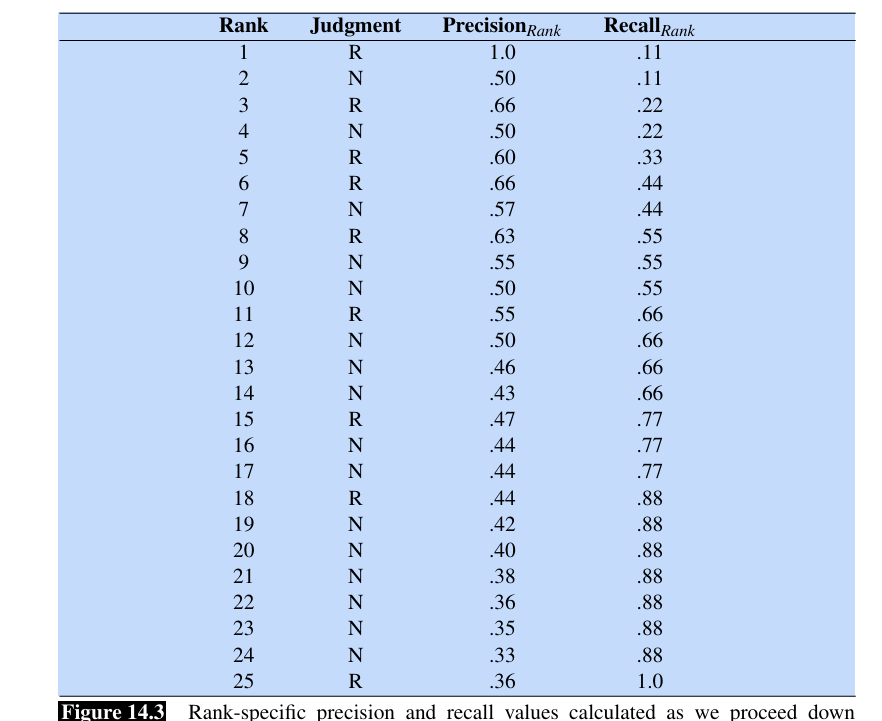

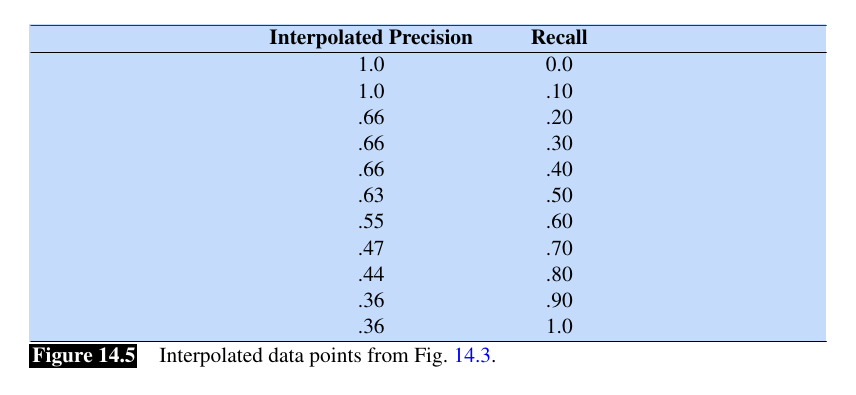

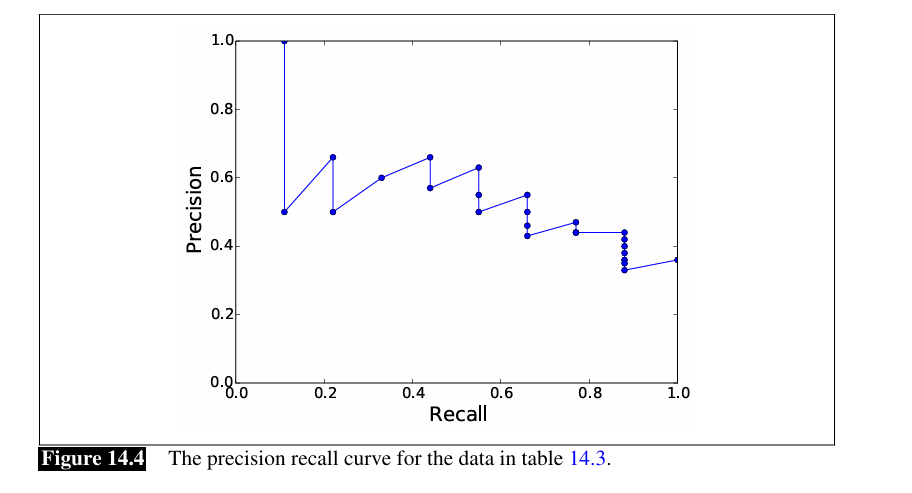

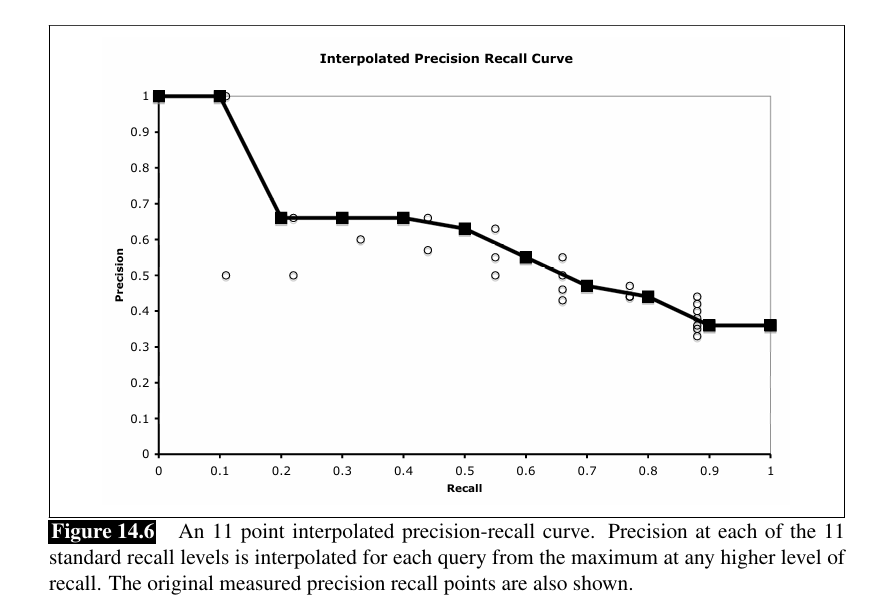

source code : https://github.com/varsharaom/Information-Retrieval-System/tree/master/Evaluation

In [ ]:
!git clone https://github.com/Lephuoctuyen/Evaluation-of-Information-Retrieval-Systems.git

Cloning into 'Evaluation-of-Information-Retrieval-Systems'...
remote: Enumerating objects: 148, done.
remote: Counting objects: 100% (148/148), done.
remote: Compressing objects: 100% (143/143), done.
remote: Total 148 (delta 59), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (148/148), 11.07 MiB | 5.45 MiB/s, done.
Resolving deltas: 100% (59/59), done.


In [ ]:
%cd Evaluation-of-Information-Retrieval-Systems

/content/Evaluation-of-Information-Retrieval-Systems


In [ ]:
from Evaluation.evaluation_script import calculate_map, print_results

In [ ]:
print_results()

In [ ]:
text = []
with open('/content/Evaluation-of-Information-Retrieval-Systems/Evaluation/Output/precision_at_rank_5_20_BM25 on noise-induced queries.txt') as file:
    text = file.readlines()

In [ ]:
text[:5]

['Precision at rank 5 and 20 for BM25 on noise-induced queries:\n',
 '\n',
 'Query_ID   Precision@05 Precision@20\n',
 '1          0.4          0.1         \n',
 '2          0.6          0.15        \n']

In [ ]:
text = []
with open('/content/Evaluation-of-Information-Retrieval-Systems/Evaluation/Output/precision_recall_values_BM25.txt','r') as file:
  text = file.readlines()
  # if file.readlines() != '\n':
  #     text = file.readlines()

In [ ]:
import pandas as pd

In [ ]:
text[:2]

['Precision and Recall Values for every query in the BM25:\n', '\n']

In [ ]:
title = text[2].replace('\n','').replace('   ',' ').split(' ')

In [ ]:
title = [item for item in title if item != '']
title

['Query_ID', 'DOC_ID', 'Relevance', 'Rank', 'Precision', 'Recall']

In [ ]:
data = [line.replace('\n','').replace(' 0.4','0.4').split('  ') for line in text[3:]]


In [ ]:
data = [[item for item in sublist if item != ''] for sublist in data]
data = [[item for item in sublist if item != ' '] for sublist in data]
data = [[item if item != ' 0.4' else '0.4' for item in sublist] for sublist in data]


In [ ]:
data[:2]

[['1', 'CACM-2319', 'NR', ' 1', ' 0.0', '0.0'],
 ['1', 'CACM-2379', 'NR', ' 2', ' 0.0', '0.0']]

In [ ]:
df = pd.DataFrame(data[:100],columns=title)

In [ ]:
df[['Precision','Recall']][:100]

,Precision,Recall
0,0.0,0.0
1,0.0,0.0
2,0.0,0.0
3,0.25,0.2
4,0.4,0.4
...,...,...
95,0.03,0.6
96,0.03,0.6
97,0.03,0.6
98,0.03,0.6


Text(0.5, 1.0, 'Precision-Recall Curve')

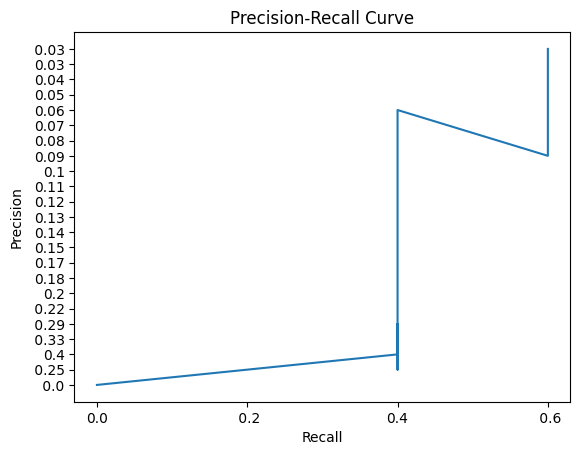

In [ ]:
import matplotlib.pyplot as plt


plt.plot(df['Recall'],df['Precision'])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

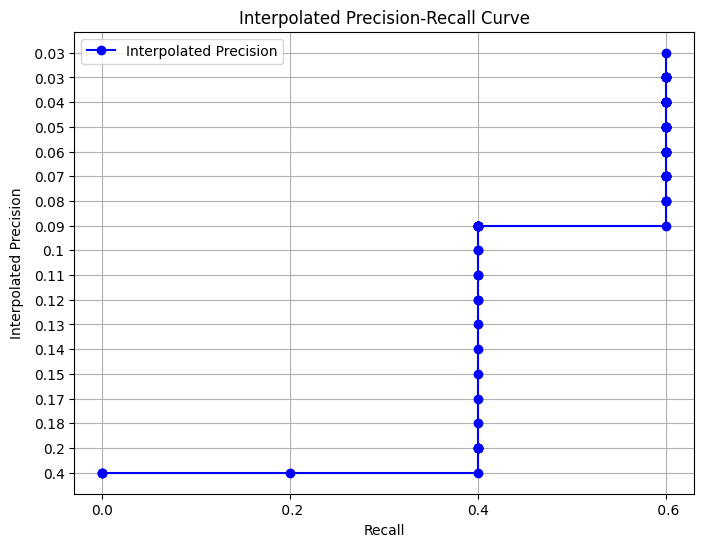

In [ ]:
interpolated_precision = [max(df['Precision'][i:]) for i in range(len(df['Precision']))]
plt.figure(figsize=(8, 6))
plt.plot(df['Recall'], interpolated_precision, label='Interpolated Precision', color='b', marker='o')
plt.xlabel('Recall')
plt.ylabel('Interpolated Precision')
plt.title('Interpolated Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
x = df['Precision']
y = df['Recall']
y.unique()

array(['0.0', ' 0.2', '0.4', ' 0.6'], dtype=object)

In [ ]:
y_unique = y.unique()

In [ ]:
x_unique = x.unique()

ValueError: x and y must have same first dimension, but have shapes (23,) and (5,)

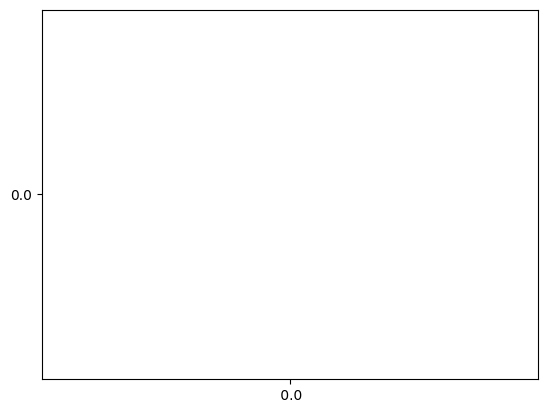

In [ ]:
plt.plot(x_unique,y_unique)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')

Nếu bạn cần hiểu rõ hơn cách precision và recall thay đổi ở các ngưỡng khác nhau, đặc biệt trong bài toán có sự mất cân bằng giữa các lớp, thì Precision-Recall Curve là lựa chọn hữu ích.

Nếu cần một con số duy nhất để so sánh trực tiếp hiệu quả của các hệ thống, đặc biệt chú trọng đến thứ tự sắp xếp kết quả, thì MAP là lựa chọn tốt hơn.

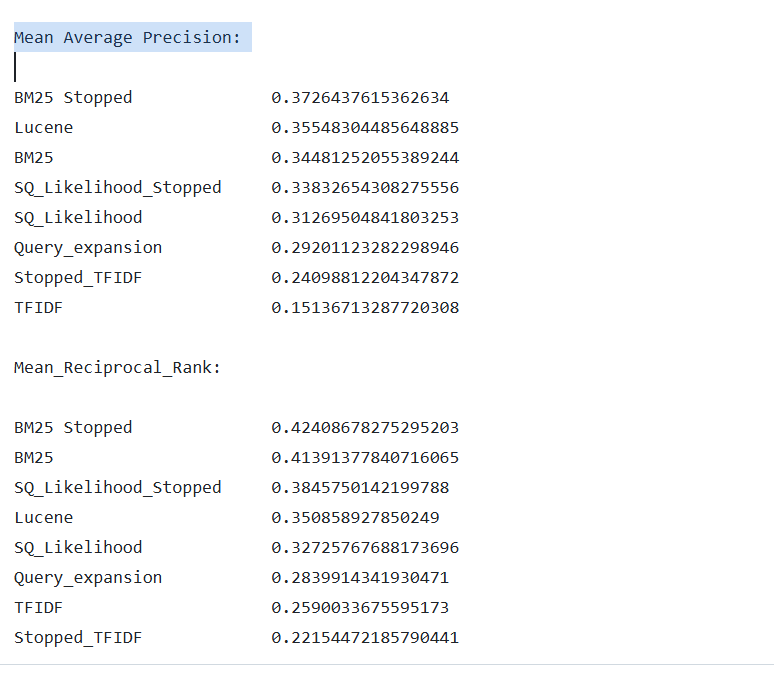

## Information Retrieval with Dense Vectors

Đặt vấn đề :  The classic tf-idf or BM25 algorithms for IR have long been known to have a con
ceptual flaw: **they work only if there is exact overlap of words between the query and document**(Chúng chỉ hoạt đóng nếu sự chồng chéo chính xác giữa các truy vấn và tài liệu). In other words, the user posing a query (or asking a question) needs to guess exactly what words the writer of the answer might have used, an issue called the vocabulary mismatch problem (Furnas et al., 1987).
(Nói cách khác, người dùng đặt ra một truy vấn (hoặc đặt câu hỏi) cần phải đoán chính xác những từ mà người viết câu trả lời có thể đã sử dụng, một vấn đề được gọi là vấn đề không khớp từ vựng (Furnas et al., 1987))

Ví dụ về vấn đề này giả sử chúng ta : Giả sử khi chúng ta đặt câu hỏi là What is A?, hệ thống phải biết được A là ai, có thể là một tên của nhân vật nổi tiếng hay là một địa điểm nhưng điều này rất khó đối với tf-idf or BM25 khi mà nó chỉ có thể hiểu được sự chồng chéo chính xác, chứ không hề biết về ngữ nghĩa.

Solve : The solution to this problem is to use an approach that can handle synonymy (Giải pháp cho vấn đề này là sử dụng một cách tiếp cận có thể xử lý đồng nghĩa)

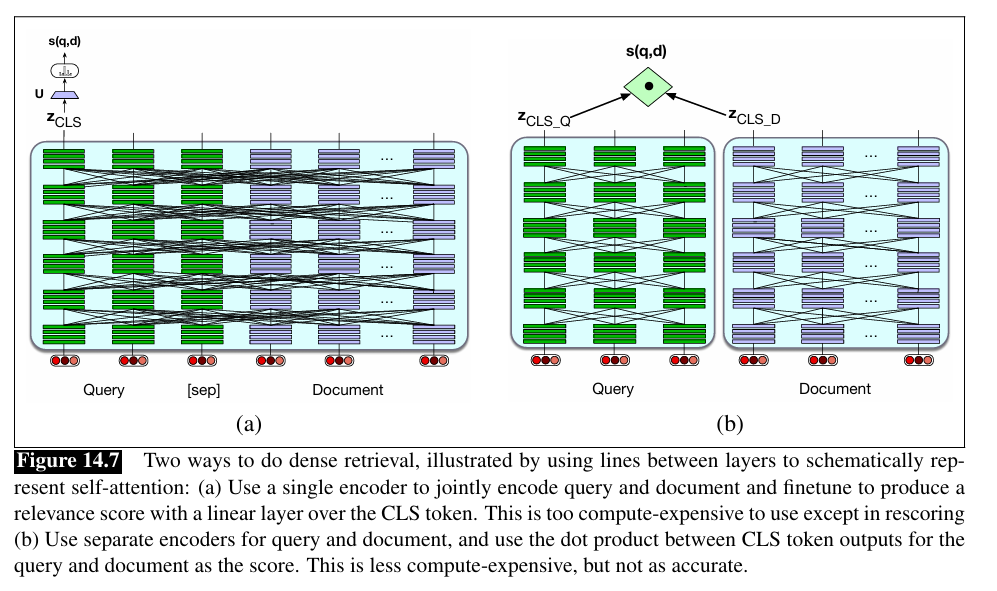

2 cách IR bằng BERT:

cách 1 : như kiến trúc 14.7a

Vấn đề với kiến trúc BERT đầy đủ trong Hình 14.7a là chi phí tính toán và thời gian. Với kiến trúc này, mỗi khi chúng ta nhận được một truy vấn, chúng ta phải chuyển từng tài liệu trong toàn bộ bộ sưu tập của mình thông qua bộ mã hóa BERT cùng với truy vấn mới! Việc sử dụng tài nguyên khổng lồ này là không thực tế đối với các trường hợp thực tế.

cách 2 : như kiến trúc 14.7b
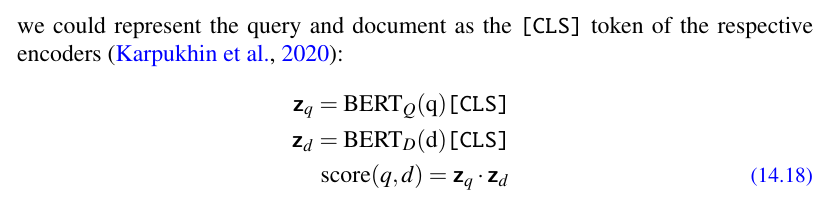

Trong kiến trúc này, chúng ta chỉ có thể mã hóa các tài liệu trong bộ sưu tập một lần bằng cách sử dụng hai mô hình bộ mã hóa riêng biệt, một để mã hóa truy vấn và một để mã hóa tài liệu. Chúng tôi mã hóa từng tài liệu và lưu trữ trước tất cả các vectơ tài liệu được mã hóa. Khi một truy vấn đến, chúng tôi chỉ mã hóa truy vấn này và sau đó sử dụng tích chấm giữa vectơ truy vấn và các vectơ tài liệu được đặt trước làm điểm cho mỗi tài liệu ứng cử viên (Hình 14.7b)

Ví dụ: nếu chúng ta sử dụng BERT, chúng ta sẽ có hai bộ mã hóa **[BERTQ](https://arxiv.org/pdf/2004.12832)** và chúng ta có thể biểu diễn truy vấn và tài liệu dưới dạng mã thông báo [CLS] của các bộ mã hóa tương ứng (Karpukhin et al., 2020):

bi-encoder : Bộ mã hóa kép rẻ hơn nhiều so với bộ mã hóa truy vấn / tài liệu đầy đủ, nhưng cũng kém chính xác hơn, vì quyết định liên quan của nó không thể tận dụng tối đa tất cả các tương tác có nghĩa là khả thi giữa tất cả các mã thông báo trong truy vấn và mã thông báo trong tài liệu

Có **rất nhiều cách tiếp cận nằm giữa bộ mã hóa đầy đủ và bộ mã hóa bi**. Một giải pháp thay thế trung gian là sử dụng các phương pháp rẻ hơn (như BM25) làm xếp hạng mức độ liên quan vượt qua đầu tiên cho mỗi tài liệu, lấy các tài liệu được xếp hạng N hàng đầu và **sử dụng các phương pháp đắt tiền như tính điểm BERT đầy đủ để chỉ xếp hạng lại các tài liệu N hàng đầu thay vì toàn bộ tập hợp**

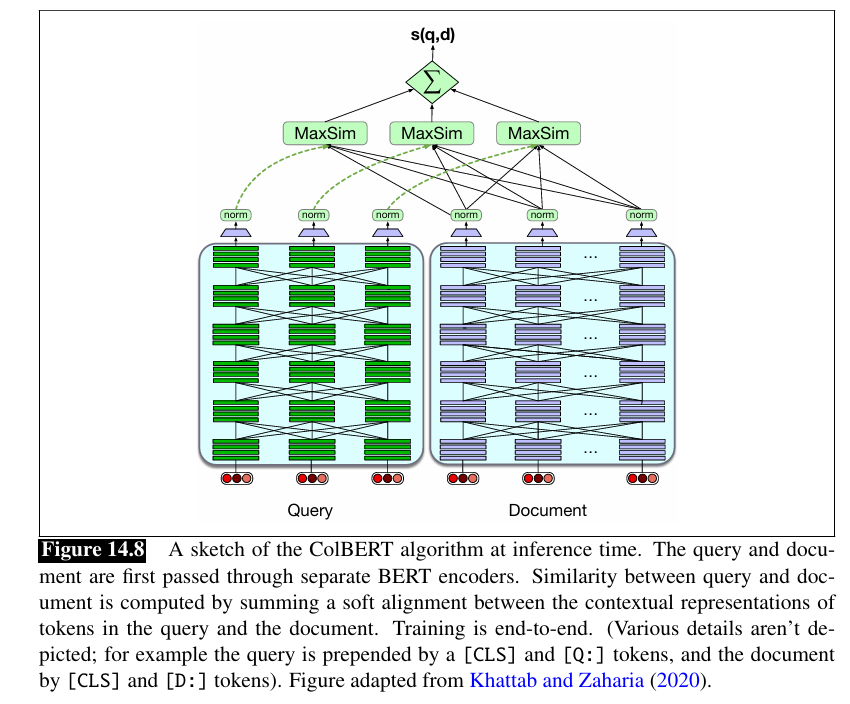

**[ColBERT](https://arxiv.org/pdf/2004.12832)** (Contextualized Late Interaction over BERT), do Khattab và Zaharia (2020) phát triển, là một phương pháp mã hóa riêng biệt cho truy vấn và tài liệu nhưng thay vì mã hóa toàn bộ thành một vector duy nhất, **ColBERT mã hóa mỗi từ thành các biểu diễn ngữ cảnh riêng biệt cho từng token**. Phương pháp này tận dụng **các biểu diễn BERT của từng từ trong tài liệu**, có thể được lưu trữ trước để tăng hiệu quả.

Cơ chế tính điểm của ColBERT **dựa trên phép cộng của các giá trị tương đồng lớn nhất (MaxSim) giữa các token trong truy vấn $ q $ và các token trong tài liệu $ d $**. Với mỗi token trong $ q $, ColBERT **tìm token có độ tương đồng ngữ cảnh cao nhất** trong $ d $ và cộng các điểm tương đồng này lại. **Tài liệu nào có nhiều token giống với truy vấn sẽ được coi là phù hợp hơn.**

Chi tiết kỹ thuật:
1. Truy vấn $ q $ được chia nhỏ thành [q1, q2, ..., qN] (**thường N=32**), được thêm vào token đặc biệt [CLS] và [Q], và được xử lý qua BERT để nhận các vector ngữ cảnh. Tương tự, tài liệu $ d $ cũng được xử lý, bao gồm các token [d1, d2, ..., dm], thêm token [CLS] và [D].
2. **Một lớp tuyến tính điều chỉnh kích thước output nhằm tối ưu hóa không gian lưu trữ và các vector được chuẩn hóa về độ dài đơn vị**.
3. **Điểm liên quan của tài liệu $ d $ với truy vấn $ q $ được tính bằng công thức**: $$ \text{score}(q, d) = \sum_{i=1}^N \max_{j=1}^m \langle E_{q_i}, E_{d_j} \rangle $$ trong đó $ E_{q_i} $ và $ E_{d_j} $ là các vector ngữ cảnh.

ColBERT cần được huấn luyện toàn diện để tối ưu hóa các tham số, bao gồm các biểu diễn đặc biệt [Q] và [D]. Mô hình được đào tạo trên các cặp truy vấn, tài liệu tích cực và tài liệu tiêu cực, tối ưu hóa qua hàm mất mát cross-entropy. Các tập dữ liệu có thể bao gồm các ví dụ có nhãn như MS MARCO Ranking hoặc sử dụng các tài liệu tiêu cực được lấy mẫu ngẫu nhiên từ kết quả của một hệ thống truy xuất thông tin khác.

Supervision có hướng dẫn dựa trên mức độ liên quan (**[relevance-guided supervision](https://arxiv.org/pdf/2007.00814)**) có thể được sử dụng (Khattab và cộng sự, 2021) dựa trên thực tế rằng nhiều bộ dữ liệu chứa các câu trả lời ngắn. Trong phương pháp này, một hệ thống truy xuất thông tin (IR) hiện có sẽ được sử dụng để **lấy các ví dụ có chứa các chuỗi câu trả lời ngắn (vài kết quả đứng đầu sẽ được coi là tài liệu tích cực**) hoặc **không chứa các chuỗi này (vài kết quả đứng đầu sẽ được coi là tài liệu tiêu cực)**. Những ví dụ này sẽ được dùng để huấn luyện một mô hình truy xuất mới, và quá trình này sẽ được lặp lại nhiều lần.

**Faiss**  
Hiệu quả là một vấn đề quan trọng, vì mọi tài liệu có thể cần được xếp hạng theo độ tương đồng với truy vấn. **Với các vector thưa** dựa trên số lượng từ, chỉ mục đảo chiều (**the inverted index**) cho phép thực hiện việc này rất hiệu quả. **Đối với các thuật toán vector dày**, việc tìm tập hợp các vector tài liệu có **tích vô hướng cao nhất với vector truy vấn là một dạng của bài toán tìm kiếm láng giềng gần nhất. Do đó, các hệ thống hiện đại sử dụng các thuật toán tìm kiếm láng giềng gần đúng, chẳng hạn như Faiss** (Johnson và cộng sự, 2017).

**[Faiss](https://arxiv.org/pdf/1702.08734)** sử dụng Approximate Nearest Neighbor Search (Tìm kiếm Lân cận gần nhất xấp xỉ): **Thay vì tính toán tích vô hướng giữa câu hỏi và tất cả các tài liệu**, Faiss sử dụng các thuật toán **tìm kiếm gần đúng để giảm số lượng so sánh. Nó nhanh chóng tìm ra một nhóm tài liệu có vector gần với vector của câu hỏi, ngay cả khi không cần so sánh với tất cả các tài liệu trong cơ sở dữ liệu**.

Câu hỏi: "Ai là tổng thống Hoa Kỳ trong năm 1969?"

Vector câu hỏi: Được mã hóa thành một vector q_vec.

Vector tài liệu: Giả sử có 1 triệu tài liệu, mỗi tài liệu đã được mã hóa thành một vector trong cơ sở dữ liệu.

Nếu không sử dụng Faiss, hệ thống sẽ cần tính tích vô hướng giữa q_vec và 1 triệu vector tài liệu. Nhưng với Faiss, hệ thống chỉ cần tính toán cho một nhóm tài liệu "gần nhất" (ví dụ, 1000 tài liệu) và từ đó chọn các tài liệu liên quan nhất.

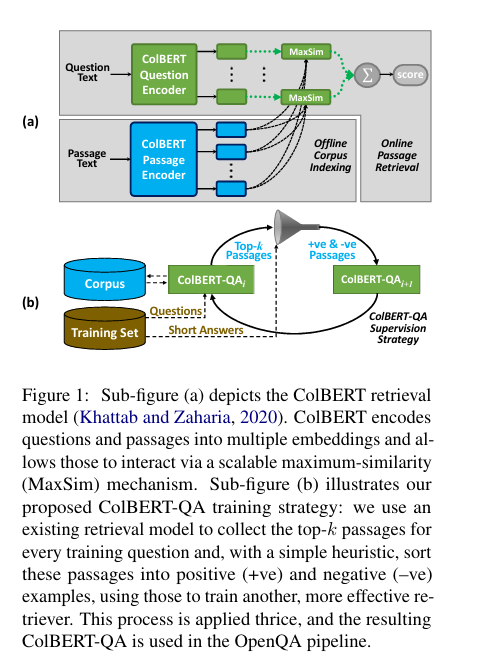

Sử dụng mô hình ColBERT kết hợp với thư viện FAISS của Facebook để thực hiện tìm kiếm Top-k tài liệu từ một tập dữ liệu lớn.

ColBERT là mô hình tương tác muộn (late interaction) giúp cải thiện độ bao phủ khi tìm kiếm so với các phương pháp dựa trên từ vựng (term-based retrieval). Khi số lượng tài liệu lớn, ColBERT kết hợp với FAISS để tìm kiếm nhanh hơn, chỉ tập trung vào các tài liệu có điểm số cao nhất (Top-k).

- **Giai đoạn 1**: Dùng FAISS để lọc nhanh các tài liệu liên quan đến truy vấn. Mỗi vector truy vấn sẽ tìm kiếm Top-k tài liệu có điểm tương đồng cao nhất bằng cách sử dụng FAISS và MaxSim.
- **Giai đoạn 2**: Từ danh sách các tài liệu được lọc ở giai đoạn đầu, ColBERT sẽ thực hiện xếp hạng chính xác bằng cách tính toán lại độ tương đồng cho từng tài liệu.

FAISS trong ColBERT sử dụng **chỉ mục IVFPQ** để tăng tốc độ tìm kiếm. Trong chỉ mục này, không gian embedding được phân cụm bằng thuật toán k-means. Sau đó, chỉ tìm kiếm trên các cụm gần với vector truy vấn, giúp giảm thiểu số lượng tính toán cần thiết. Chỉ mục cũng chia nhỏ các vector thành các sub-vector và mã hóa chúng để tiết kiệm bộ nhớ và tăng tốc độ tính toán.

chỉ lục trong Faiss : https://github-com.translate.goog/facebookresearch/faiss/wiki/Faiss-indexes?_x_tr_sl=en&_x_tr_tl=vi&_x_tr_hl=vi&_x_tr_pto=tc


Các chỉ mục cơ bản được liệt kê dưới đây:

| Phương pháp                                     | Tên lớp                 | index_factory       | Tham số chính                       | Byte mỗi vector | Duyệt toàn bộ | Ghi chú                                                         |
|-------------------------------------------------|-------------------------|---------------------|-------------------------------------|------------------|---------------|-----------------------------------------------------------------|
| Tìm kiếm chính xác theo L2                      | `IndexFlatL2`          | "Flat"             | `d`                                 | `4*d`           | Có            | Dùng phương pháp duyệt toàn bộ dữ liệu (brute-force)           |
| Tìm kiếm chính xác theo Inner Product           | `IndexFlatIP`          | "Flat"             | `d`                                 | `4*d`           | Có            | Cũng dùng cho cosine (chuẩn hóa vector trước)                  |
| Đồ thị HNSW                                     | `IndexHNSWFlat`        | "HNSW,Flat"        | `d, M`                              | `4*d + x * M * 2 * 4` | Không         | Sử dụng đồ thị HNSW để tìm kiếm                                  |
| File đảo ngược với xác minh chính xác           | `IndexIVFFlat`         | "IVFx,Flat"        | `quantizer, d, nlists, metric`      | `4*d + 8`       | Không         | Nhận chỉ mục khác để gán các vector vào các danh sách đảo      |
| Băm nhạy cảm địa phương (chỉ mục nhị phân)      | `IndexLSH`             | -                  | `d, nbits`                          | `ceil(nbits/8)` | Có            | Sử dụng phép quay ngẫu nhiên thay cho chiếu ngẫu nhiên          |
| Bộ lượng tử scalar (SQ) ở chế độ phẳng          | `IndexScalarQuantizer` | "SQ8"              | `d`                                 | `d`             | Có            | Cũng có sẵn các bộ 4 và 6 bit cho mỗi thành phần                |
| Bộ lượng tử tích (PQ) ở chế độ phẳng            | `IndexPQ`              | "PQx", "PQ"M"x"nbits | `d, M, nbits`                      | `ceil(M * nbits / 8)` | Có |                                                             |
| IVF và bộ lượng tử scalar                       | `IndexIVFScalarQuantizer` | "IVFx,SQ4", "IVFx,SQ8" | `quantizer, d, nlists, qtype` | `SQfp16: 2 * d + 8, SQ8: d + 8` hoặc `SQ4: d/2 + 8` | Không | Giống `IndexScalarQuantizer`                                   |
| IVFADC (bộ lượng tử thô + PQ trên phần dư)      | `IndexIVFPQ`           | "IVFx,PQ"y"x"nbits | `quantizer, d, nlists, M, nbits`    | `ceil(M * nbits/8)+8` | Không       |                                                             |
| IVFADC+R (IVFADC + tái xếp hạng dựa trên mã)    | `IndexIVFPQR`          | "IVFx,PQy+z"       | `quantizer, d, nlists, M, nbits, M_refine, nbits_refine` | `M+M_refine+8` | Không       |                                                             |

Chỉ mục có thể được tạo một cách rõ ràng với hàm tạo lớp hoặc sử dụng `index_factory`.

In [ ]:
import faiss
import numpy as np

# Tạo dữ liệu mẫu
d = 128       # Kích thước của vector
nb = 1000000  # Số lượng vector trong cơ sở dữ liệu
nq = 5        # Số lượng truy vấn
np.random.seed(1234)
xb = np.random.random((nb, d)).astype('float32')
xq = np.random.random((nq, d)).astype('float32')

# Số lượng cell và mã PQ
nlists = 100  # Số lượng cell
M = 8         # Số lượng sub-vector
quantizer = faiss.IndexFlatL2(d)  # Bộ phân cụm k-means
index = faiss.IndexIVFPQ(quantizer, d, nlists, M, 8)  # Mã PQ với 8 bit

# Huấn luyện và thêm dữ liệu vào chỉ mục
index.train(xb)
index.add(xb)

# Tìm kiếm k=10 vector gần nhất cho mỗi truy vấn
index.nprobe = 10  # Số lượng cell sẽ duyệt qua
k = 10
D, I = index.search(xq, k)
print("Indices of the closest neighbors:", I)
print("Distances of the closest neighbors:", D)


**Relevance-guided Supervision for OpenQA with ColBERT**

#### Coding

**Dense Passage Retrieval (DPR)** is a set of tools and models for state-of-the-art open-domain Q&A research. It was introduced in Dense Passage Retrieval for Open-Domain Question Answering by Vladimir Karpukhin, Barlas Oğuz, Sewon Min, Patrick Lewis, Ledell Wu, Sergey Edunov, Danqi Chen, Wen-tau Yih.

xem thêm code : https://github.com/facebookresearch/DPR/tree/main

In [ ]:
from transformers import DPRReader, DPRReaderTokenizer

tokenizer = DPRReaderTokenizer.from_pretrained("facebook/dpr-reader-single-nq-base")
model = DPRReader.from_pretrained("facebook/dpr-reader-single-nq-base")
encoded_inputs = tokenizer(
    questions=["What is love ?"],
    titles=["Haddaway"],
    texts=["'What Is Love' is a song recorded by the artist Haddaway"],
    return_tensors="pt",
)
outputs = model(**encoded_inputs)
start_logits = outputs.start_logits
end_logits = outputs.end_logits
relevance_logits = outputs.relevance_logits

The tokenizer class you load from this checkpoint is not the same type as the class this function is called from. It may result in unexpected tokenization. 
The tokenizer class you load from this checkpoint is 'DPRQuestionEncoderTokenizer'. 
The class this function is called from is 'DPRReaderTokenizer'.
/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


pytorch_model.bin:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of the model checkpoint at facebook/dpr-reader-single-nq-base were not used when initializing DPRReader: ['span_predictor.encoder.bert_model.pooler.dense.bias', 'span_predictor.encoder.bert_model.pooler.dense.weight']
- This IS expected if you are initializing DPRReader from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DPRReader from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
import torch
import torch.nn.functional as F
# Tính xác suất từ các logits bằng softmax và tìm vị trí bắt đầu và kết thúc có xác suất cao nhất
start_probabilities = F.softmax(start_logits)
end_probabilities = F.softmax(end_logits)

start_index = torch.argmax(start_probabilities, axis=-1).numpy()[0]
end_index = torch.argmax(end_probabilities, axis=-1).numpy()[0]

# Sử dụng tokenizer để giải mã ra câu trả lời từ các token trong khoảng start_index và end_index
input_ids = encoded_inputs['input_ids'].numpy()[0]  # lấy các mã token từ encoded_inputs
answer_tokens = input_ids[start_index: end_index + 1]
answer = tokenizer.decode(answer_tokens)

print("Answer:", answer)


Answer: a song


<ipython-input-10-0fe256ba8c98>:4: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  start_probabilities = F.softmax(start_logits)
<ipython-input-10-0fe256ba8c98>:5: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  end_probabilities = F.softmax(end_logits)


code **[colBERT](https://colab.research.google.com/github/stanford-futuredata/ColBERT/blob/main/docs/intro2new.ipynb#scrollTo=JRiOnzxtwI0j)**

*Theo* [Varun030403](https://medium.com/@varun030403/colbert-a-complete-guide-1552468335ae) có các bước để tạo ra một mô hình ColBeart

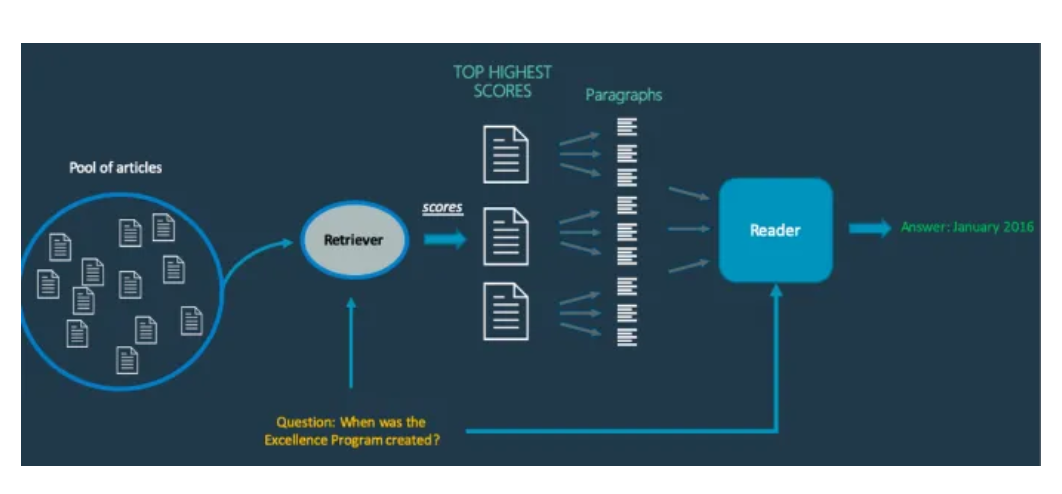

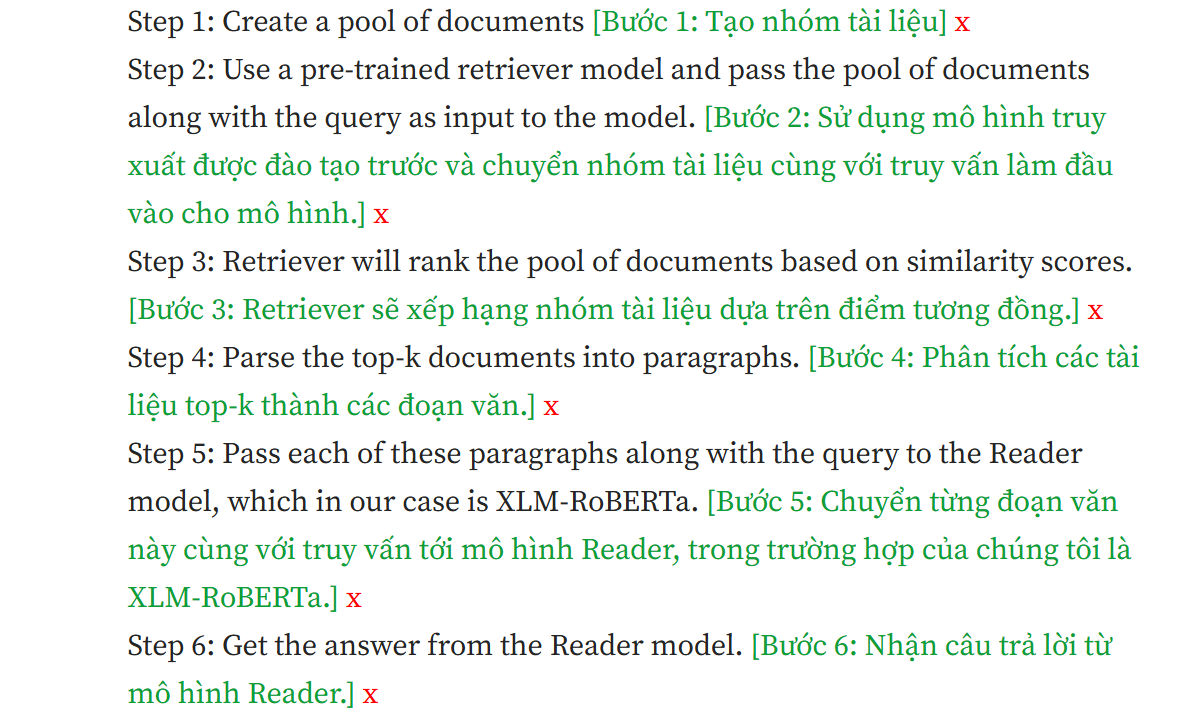

https://github.com/stanford-futuredata/ColBERT/tree/main/colbert


code **[faiss](https://github.com/facebookresearch/faiss/tree/main)**

In [ ]:
pip install faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 17.9 MB/s eta 0:00:00


In [ ]:
import faiss
import numpy as np

# Tạo dữ liệu mẫu - 1 triệu vector với 128 chiều
d = 128       # Kích thước vector
nb = 1000000  # Số lượng vector trong cơ sở dữ liệu
nq = 5        # Số lượng truy vấn
np.random.seed(1234)

# Tạo ngẫu nhiên vector cơ sở dữ liệu và vector truy vấn
xb = np.random.random((nb, d)).astype('float32')
xq = np.random.random((nq, d)).astype('float32')

# Khởi tạo IndexFlatL2 và thêm dữ liệu vào chỉ mục
index = faiss.IndexFlatL2(d)  # L2 distance
index.add(xb)                 # Thêm các vector cơ sở dữ liệu vào FAISS

# Tìm kiếm k=10 vector gần nhất cho mỗi truy vấn
k = 10
D, I = index.search(xq, k)  # D là khoảng cách, I là chỉ mục của các vector gần nhất

print("Indices of the closest neighbors:", I)
print("Distances of the closest neighbors:", D)


In [ ]:
import numpy as np
d = 64
nb = 1000000
nq = 10000
np.random.seed(1234)
xb = np.random.random((nb, d)).astype('float32')
xb[:,0] += np.arange(nb)/1000.
xq = np.random.random((nq, d)).astype('float32')
xq[:,0] += np.arange(nq)/1000.

In [ ]:
import faiss                   # make faiss available
index = faiss.IndexFlatL2(d)   # build the index
print(index.is_trained)
index.add(xb)                  # add vectors to the index
print(index.ntotal)

True
1000000


**`Searching`**

The basic search operation that can be performed on an index is the k-nearest-neighbor search, ie. for each query vector, find its k nearest neighbors in the database. [Hoạt động tìm kiếm cơ bản có thể được thực hiện trên một chỉ mục là tìm kiếm k-lân cận gần nhất, tức là. với mỗi vectơ truy vấn, hãy tìm k lân cận gần nhất của nó trong cơ sở dữ liệu.] x


The result of this operation can be conveniently stored in an integer matrix of size nq-by-k, where row i contains the IDs of the neighbors of query vector i, sorted by increasing distance. In addition to this matrix, the search operation returns a nq-by-k floating-point matrix with the corresponding squared distances. [Kết quả của thao tác này có thể được lưu trữ thuận tiện trong một ma trận số nguyên có kích thước nq-by-k, trong đó hàng i chứa ID của các lân cận của vectơ truy vấn i, được sắp xếp theo khoảng cách tăng dần. Ngoài ma trận này, thao tác tìm kiếm còn trả về ma trận dấu phẩy động nq-by-k với khoảng cách bình phương tương ứng.] x



As a sanity check, we can first search a few database vectors, to make sure the nearest neighbor is indeed the vector itself. [Để kiểm tra độ chính xác, trước tiên chúng ta có thể tìm kiếm một vài vectơ cơ sở dữ liệu để đảm bảo rằng láng giềng gần nhất thực sự chính là vectơ đó.] x

In [ ]:
# print(xb[:5])

[[0.19151945 0.62210876 0.43772775 0.7853586  0.77997583 0.2725926
  0.27646425 0.8018722  0.95813936 0.87593263 0.35781726 0.5009951
  0.6834629  0.71270204 0.37025076 0.5611962  0.50308317 0.01376845
  0.7728266  0.8826412  0.364886   0.6153962  0.07538124 0.368824
  0.9331401  0.65137815 0.39720258 0.78873014 0.31683612 0.56809866
  0.8691274  0.4361734  0.8021476  0.14376682 0.70426095 0.7045813
  0.21879211 0.92486763 0.44214076 0.90931594 0.05980922 0.18428709
  0.04735528 0.6748809  0.59462476 0.5333102  0.04332406 0.5614331
  0.32966843 0.5029668  0.11189432 0.6071937  0.5659447  0.00676406
  0.6174417  0.9121229  0.7905241  0.99208146 0.95880175 0.7919641
  0.28525096 0.62491673 0.4780938  0.19567518]
 [0.38331744 0.05387368 0.4516484  0.98200476 0.1239427  0.1193809
  0.73852307 0.58730364 0.47163254 0.10712682 0.22921857 0.89996517
  0.41675353 0.53585166 0.00620852 0.30064172 0.43689317 0.612149
  0.91819805 0.62573665 0.7059976  0.14983371 0.7460634  0.831007
  0.63372576 

In [ ]:
k = 4
D, I = index.search(xb[:5], k )
print(D)
print(I)

[[0.        7.1751738 7.20763   7.2511625]
 [0.        6.3235645 6.684581  6.799946 ]
 [0.        5.7964087 6.391736  7.2815123]
 [0.        7.2779055 7.5279875 7.662846 ]
 [0.        6.7638035 7.2951202 7.3688145]]
[[  0 393 363  78]
 [  1 555 277 364]
 [  2 304 101  13]
 [  3 173  18 182]
 [  4 288 370 531]]


In [ ]:
D, I = index.search(xq, k)
print(D[:5])
print(I[-5:])

[[6.8088226 6.829796  6.8576927 6.8842087]
 [7.1985703 7.380829  7.4176826 7.491226 ]
 [7.2444    7.460396  7.4658546 7.6690903]
 [6.293293  6.4149857 6.531719  6.7257767]
 [7.6404305 7.77285   7.8547783 8.039719 ]]
[[10179 10714  9864  8813]
 [ 9762 10013  9720 10405]
 [ 9229  9510 10039 10602]
 [10584  9725  9787  9816]
 [ 9464  9635 10199  9180]]


Một phiên bản đơn giản hơn colBert call is [nanoColBert](https://github.com/Hannibal046/nanoColBERT):

In [ ]:
!git clone https://github.com/Hannibal046/nanoColBERT.git

Cloning into 'nanoColBERT'...
remote: Enumerating objects: 65, done.
remote: Counting objects: 100% (65/65), done.
remote: Compressing objects: 100% (41/41), done.
remote: Total 65 (delta 27), reused 58 (delta 22), pack-reused 0 (from 0)
Receiving objects: 100% (65/65), 868.06 KiB | 2.72 MiB/s, done.
Resolving deltas: 100% (27/27), done.


In [ ]:
%cd nanoColBERT

/content/nanoColBERT


In [ ]:
!bash scripts/download.sh
!bash scripts/run_colbert.sh

--2024-11-12 13:37:49--  https://msmarco.blob.core.windows.net/msmarcoranking/collectionandqueries.tar.gz
Resolving msmarco.blob.core.windows.net (msmarco.blob.core.windows.net)... 20.150.34.4
Connecting to msmarco.blob.core.windows.net (msmarco.blob.core.windows.net)|20.150.34.4|:443... connected.
HTTP request sent, awaiting response... 409 Public access is not permitted on this storage account.
2024-11-12 13:37:49 ERROR 409: Public access is not permitted on this storage account..

--2024-11-12 13:37:49--  https://msmarco.blob.core.windows.net/msmarcoranking/triples.train.small.tar.gz
Resolving msmarco.blob.core.windows.net (msmarco.blob.core.windows.net)... 20.150.34.4
Connecting to msmarco.blob.core.windows.net (msmarco.blob.core.windows.net)|20.150.34.4|:443... connected.
HTTP request sent, awaiting response... 409 Public access is not permitted on this storage account.
2024-11-12 13:37:49 ERROR 409: Public access is not permitted on this storage account..

--2024-11-12 13:37:49--

In [ ]:
from model import ColBERT
from transformers import BertTokenizer

pretrained_model = "nanoColBERT/ColBERTv1"
model = ColBERT.from_pretrained(pretrained_model)
tokenizer = BertTokenizer.from_pretrained(pretrained_model)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/692 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/436M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.64k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/35.0 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/436 [00:00<?, ?B/s]

## Answering Questions with RAG

https://github.com/AnswerDotAI/RAGatouille/tree/main/examples

https://www.kaggle.com/code/bachngoh/the-ultimate-guide-on-rag-w-gemma-llama-index

Fig. 14.9 sketches out this standard QA model.
 In the first stage of the 2-stage retrieve and read model in Fig. 14.9 we **retrieve relevant passage**s from a text collection, for example using the dense retrievers of the previous section. In the second reader stage, we generate the answer via **retrieval augmented generation**. In this method, we take a large pretrained language model, give it the set of retrieved passages and other text as its prompt, and autoregressively generate a new answer token by token.


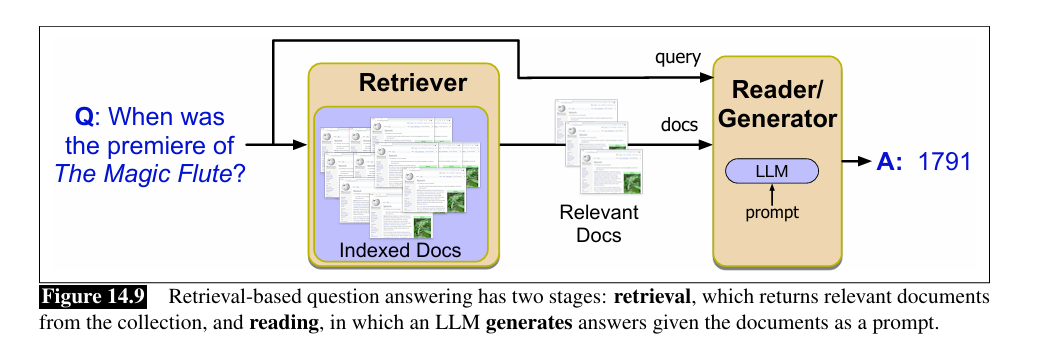



**Tổng quan về Sinh câu Hồi đáp Tăng cường Truy vấn (Retrieval-Augmented Generation - RAG)**

Thuật toán sinh câu tiêu chuẩn là sinh từ một mô hình ngôn ngữ lớn, có điều kiện dựa trên các đoạn văn được truy vấn. Phương pháp này được gọi là **sinh câu hồi đáp tăng cường truy vấn (retrieval-augmented generation, hoặc RAG)**.

Nhớ lại rằng trong sinh câu có điều kiện đơn giản, chúng ta có thể xem nhiệm vụ trả lời câu hỏi giống như dự đoán từ tiếp theo bằng cách đưa cho mô hình ngôn ngữ một câu hỏi và một token gợi ý, chẳng hạn như “A:”, gợi ý rằng câu trả lời nên xuất hiện tiếp theo:
- **Ví dụ:** Q: Ai là tác giả của cuốn sách "Nguồn gốc các loài"? A:

Sau đó, ta sẽ sinh ra câu trả lời một cách tự hồi quy (autoregressive) dựa trên đoạn văn bản này.

Về mặt hình thức, sinh ngôn ngữ tự hồi quy tính xác suất của một chuỗi từ các token trước đó:
$$
p(x_1, \ldots, x_n) = \prod_{i=1}^{n} p(x_i | x_{<i})
$$

Trong sinh câu có điều kiện đơn giản để trả lời câu hỏi, ta sẽ thêm một prompt như “Q:”, tiếp theo là câu hỏi “q” và “A:”, tất cả được nối lại với nhau:
$$
p(x_1, \ldots, x_n) = \prod_{i=1}^{n} p([Q:]; q; [A:]; x_{<i})
$$

Ưu điểm của việc sử dụng mô hình ngôn ngữ lớn là khối lượng lớn tri thức được mã hóa trong tham số từ các văn bản mà mô hình được tiền huấn luyện. Tuy nhiên, như đã đề cập, phương pháp sinh câu có điều kiện đơn giản này có thể hiệu quả với các câu hỏi yêu cầu kiến thức đơn giản, nhưng không phải là giải pháp chung cho việc trả lời câu hỏi, vì nó có thể dẫn đến **ảo tưởng thông tin**, không thể hiển thị bằng chứng văn bản để hỗ trợ câu trả lời và không thể trả lời câu hỏi từ dữ liệu độc quyền.

Ý tưởng của sinh câu hồi đáp tăng cường truy vấn là giải quyết những vấn đề này bằng cách điều kiện hóa câu trả lời dựa trên các đoạn văn đã truy vấn như một phần của tiền tố (prefix), có thể thêm văn bản gợi ý như: “Dựa trên các đoạn văn bản này, hãy trả lời câu hỏi:”. Giả sử chúng ta có một truy vấn q và gọi tập hợp các đoạn văn đã truy vấn dựa trên nó là R(q). Ví dụ, ta có thể có một prompt như sau:

**Sơ đồ về prompt của RAG**
- đoạn văn đã truy vấn 1
- đoạn văn đã truy vấn 2
- ...
- đoạn văn đã truy vấn n

Dựa trên các đoạn văn này, hãy trả lời câu hỏi: Q: Ai là tác giả của cuốn sách "Nguồn gốc các loài"? A:

Về mặt hình thức:
$$
p(x_1, \ldots, x_n) = \prod_{i=1}^{n} p(x_i | R(q); \text{prompt}; [Q:]; q; [A:]; x_{<i})
$$

Giống như với các bộ đọc trích xuất theo đoạn (span-based extraction reader), để áp dụng thành công thuật toán sinh câu hồi đáp tăng cường truy vấn trong trả lời câu hỏi, yêu cầu phải có một bộ truy vấn hiệu quả, và thường một thuật toán truy vấn hai giai đoạn được sử dụng, trong đó các truy vấn sẽ được xếp hạng lại. Một số câu hỏi phức tạp có thể yêu cầu kiến trúc đa bước (multi-hop), trong đó một truy vấn được sử dụng để truy vấn các tài liệu, sau đó được nối vào truy vấn ban đầu để thực hiện bước truy vấn thứ hai. Các chi tiết về kỹ thuật xây dựng prompt cũng cần được làm rõ, chẳng hạn như quyết định có nên đánh dấu các đoạn văn bản bằng các token [SEP] hay không. Sự kết hợp giữa dữ liệu cá nhân và dữ liệu công khai liên quan đến mô hình ngôn ngữ lớn được lưu trữ bên ngoài cũng có thể gây ra các vấn đề về quyền riêng tư cần được xử lý (Arora và cộng sự, 2023). Nhiều nghiên cứu trong lĩnh vực này cũng tập trung vào việc tích hợp chặt chẽ hơn giữa các giai đoạn truy vấn và đọc.

**Question Answering Datasets**

Có nhiều bộ dữ liệu dành cho nhiệm vụ trả lời câu hỏi, dùng cho huấn luyện và đánh giá khả năng của các mô hình ngôn ngữ. Theo Rogers và cộng sự (2023), các bộ dữ liệu này có thể phân loại theo nhiều tiêu chí như mục đích ban đầu, ngôn ngữ, và hình thức câu trả lời.

1. **Bộ dữ liệu câu hỏi tự nhiên**:
   - **Natural Questions**: Là tập các truy vấn ẩn danh trên Google và câu trả lời dựa trên Wikipedia, với câu trả lời ngắn và dài.
   - **MS MARCO**: Bao gồm 1 triệu câu hỏi từ log truy vấn của Bing và câu trả lời con người tạo ra, cùng với 9 triệu đoạn văn để kiểm tra xếp hạng truy vấn và trả lời câu hỏi.
   - **DuReader**: Dành cho tiếng Trung, dựa trên truy vấn công cụ tìm kiếm và cộng đồng QA.
   - **TyDi QA**: Gồm 204,000 cặp câu hỏi-đáp ở 11 ngôn ngữ đa dạng, yêu cầu hệ thống chọn đoạn văn chứa câu trả lời từ Wikipedia hoặc xác định vùng câu trả lời tối thiểu.

2. **Bộ dữ liệu câu hỏi kiểm tra kiến thức**:
   - **MMLU** (Massive Multitask Language Understanding): Gồm 15,908 câu hỏi về kiến thức và lý luận trong nhiều lĩnh vực như y học, toán học, khoa học máy tính, luật pháp, dựa trên các kỳ thi như GRE và kỳ thi cấp phép y khoa.

3. **Nhiệm vụ Open Book và Closed Book**:
   - Nhiệm vụ Open Book: Yêu cầu hệ thống lấy câu trả lời từ tài liệu đính kèm. Ví dụ như Natural Questions nếu sử dụng tài liệu đi kèm.
   - Nhiệm vụ Closed Book: Không có tài liệu truy vấn, hệ thống phải trả lời trực tiếp từ kiến thức trong mô hình, ví dụ như MMLU.

Ngoài ra, các bộ dữ liệu có thể yêu cầu trả lời dưới dạng tự do hoặc trắc nghiệm, và có các biến thể về cách đưa ra câu hỏi cho mô hình, chẳng hạn như zero-shot và few-shot.

## Evaluating Question Answering


Ba kỹ thuật đánh giá phổ biến cho hệ thống trả lời câu hỏi (QA) gồm có:

1. **Exact Match (EM)**: Phương pháp này được dùng cho các câu hỏi trắc nghiệm (ví dụ như trong MMLU). Tỷ lệ phần trăm của các câu trả lời dự đoán khớp hoàn toàn với câu trả lời đúng được tính là độ chính xác exact match.

2. **F1 Score**: Đối với các câu hỏi yêu cầu trả lời dạng văn bản tự do (như trong Natural Questions), điểm F1 thường được sử dụng để đánh giá sự trùng lặp một phần giữa câu trả lời dự đoán và câu trả lời tham chiếu. Điểm F1 trung bình được tính dựa trên số lượng từ chung giữa câu trả lời dự đoán và câu trả lời tham chiếu, rồi lấy trung bình điểm F1 trên tất cả các câu hỏi.

3. **Mean Reciprocal Rank (MRR)**: Được sử dụng khi hệ thống QA đưa ra nhiều câu trả lời xếp hạng theo thứ tự. MRR tính điểm dựa trên vị trí của câu trả lời đúng đầu tiên trong danh sách xếp hạng. Điểm cho mỗi câu hỏi là nghịch đảo của thứ hạng của câu trả lời đúng đầu tiên; nếu không có câu trả lời đúng, điểm sẽ là 0. Điểm MRR trung bình là giá trị trung bình của tất cả các điểm câu hỏi trong tập kiểm tra.

Phương pháp này giúp đánh giá các hệ thống QA khi có nhiều câu trả lời xếp hạng. Trong một số phiên bản MRR, các câu hỏi có điểm 0 được loại bỏ khỏi phép tính.

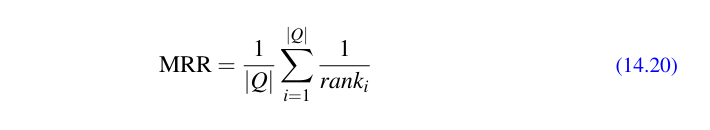

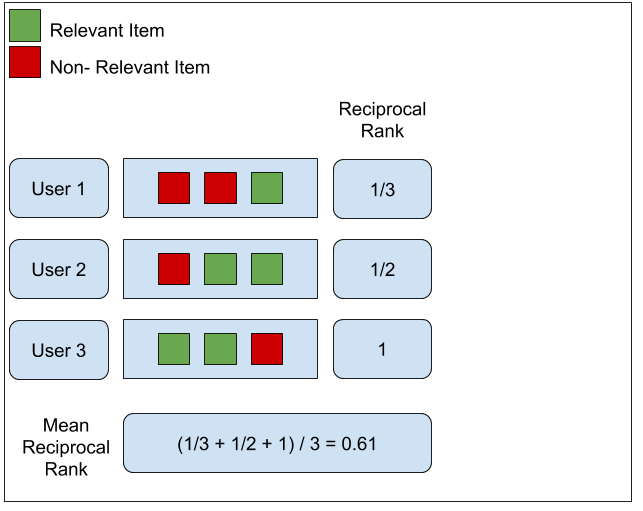

[source example MRR](https://readmedium.com/rank-aware-recsys-evaluation-metrics-5191bba16832)

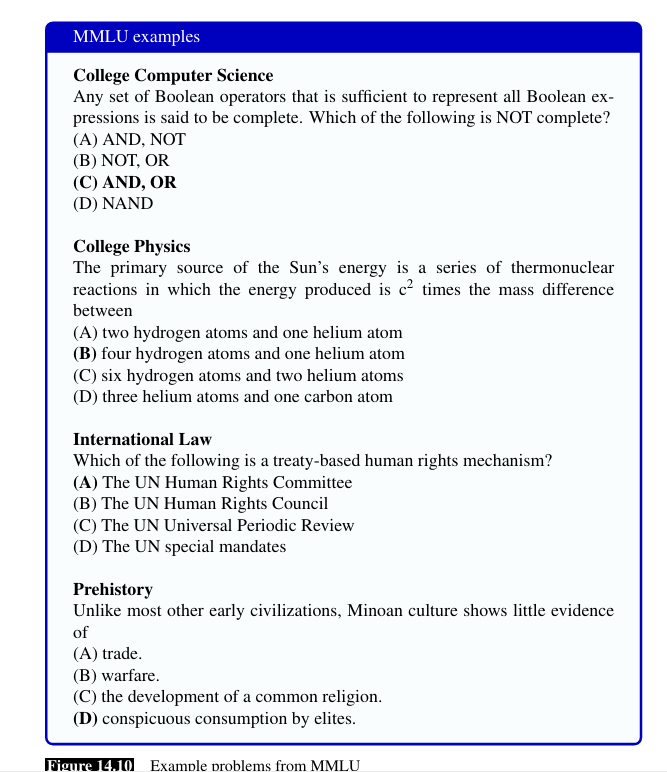

## Summary


Chương này giới thiệu các nhiệm vụ của việc trả lời câu hỏi và truy hồi thông tin.

- **Trả lời câu hỏi (QA)** là nhiệm vụ trả lời các câu hỏi của người dùng.
- Chương này tập trung vào nhiệm vụ trả lời câu hỏi dựa trên việc truy hồi thông tin, trong đó câu hỏi của người dùng được trả lời từ một tập tài liệu nào đó (có thể là web).
- **Truy hồi thông tin (IR)** là nhiệm vụ trả về các tài liệu cho người dùng dựa trên nhu cầu thông tin được thể hiện qua một truy vấn. Trong truy hồi có xếp hạng, các tài liệu được trả về theo thứ tự xếp hạng.
- Việc khớp giữa một truy vấn và tài liệu có thể thực hiện bằng cách đại diện mỗi truy vấn và tài liệu bằng một vector thưa đại diện cho tần suất các từ, được trọng số bởi tf-idf hoặc BM25. Sau đó, độ tương đồng có thể được đo bằng cosine.
- Tài liệu hoặc truy vấn có thể được đại diện bằng các vector dày đặc, bằng cách mã hóa câu hỏi và tài liệu với một mô hình encoder-only như BERT, và trong trường hợp này, tính độ tương đồng trong không gian nhúng.
- **Chỉ mục đảo ngược** là cơ chế lưu trữ giúp tìm các tài liệu có chứa một từ cụ thể một cách hiệu quả.
- Truy hồi có xếp hạng thường được đánh giá bằng **mean average precision** hoặc **precision nội suy**.
- Hệ thống trả lời câu hỏi thường sử dụng kiến trúc **retriever/reader**.
  - Trong giai đoạn retriever, một hệ thống IR được cung cấp một truy vấn và trả về một tập tài liệu.
  - Giai đoạn reader được thực hiện bằng **retrieval-augmented generation**, trong đó một mô hình ngôn ngữ lớn được yêu cầu với truy vấn và một tập tài liệu và sau đó tạo ra một câu trả lời mới có điều kiện.
- QA có thể được đánh giá bằng **exact match** nếu chỉ có một câu trả lời duy nhất, bằng **token F1 score** cho các câu trả lời dạng văn bản tự do, hoặc bằng **mean reciprocal rank** nếu có một tập câu trả lời được xếp hạng.

 Tổng quan về **[Retrieval Augmented Generation (RAG)](https://ai.plainenglish.io/a-brief-introduction-to-retrieval-augmented-generation-rag-b7eb70982891)**

**Retrieval Augmented Generation (RAG)** được đề xuất lần đầu tiên vào năm 2020 như một phương pháp tiếp cận tích hợp từ đầu đến cuối, kết hợp giữa **retriever (trình tìm kiếm)** và **generator (trình tạo)** đã được huấn luyện trước. Ban đầu, mục tiêu chính của RAG là nâng cao hiệu suất thông qua việc tinh chỉnh mô hình.

Tuy nhiên, sự ra mắt của **ChatGPT** vào tháng 12 năm 2022 đã đánh dấu một bước ngoặt lớn cho RAG. Từ đó, RAG tập trung hơn vào việc tận dụng khả năng **lý luận** của các mô hình ngôn ngữ lớn (**Large Language Models - LLM**) để đạt được kết quả tạo văn bản tốt hơn bằng cách tích hợp kiến thức bên ngoài.

Công nghệ RAG giúp các nhà phát triển không cần phải huấn luyện lại toàn bộ mô hình quy mô lớn cho mỗi tác vụ cụ thể. Thay vào đó, họ chỉ cần kết nối các cơ sở kiến thức liên quan để cung cấp thêm dữ liệu đầu vào cho mô hình, từ đó cải thiện độ chính xác của các câu trả lời.

 **Retrieval Augmented Generation (RAG) là gì?**

**Retrieval Augmented Generation (RAG)** là quá trình tăng cường khả năng của **LLM** bằng cách tích hợp thêm thông tin từ các nguồn kiến thức bên ngoài. Điều này cho phép các mô hình LLM tạo ra các câu trả lời chính xác hơn và có ngữ cảnh tốt hơn, đồng thời giảm thiểu hiện tượng "ảo giác" (hallucinations).

Khi trả lời câu hỏi hoặc tạo văn bản, RAG sẽ **truy xuất thông tin** từ các cơ sở dữ liệu kiến thức hoặc một lượng lớn tài liệu hiện có. Sau đó, **LLM** sẽ sử dụng thông tin này để tạo ra câu trả lời, giúp nâng cao chất lượng phản hồi bằng cách tích hợp thông tin đã truy xuất thay vì chỉ dựa vào mô hình LLM.

 **Quy trình làm việc của RAG**

Dưới đây là mô tả về quy trình làm việc điển hình của RAG:
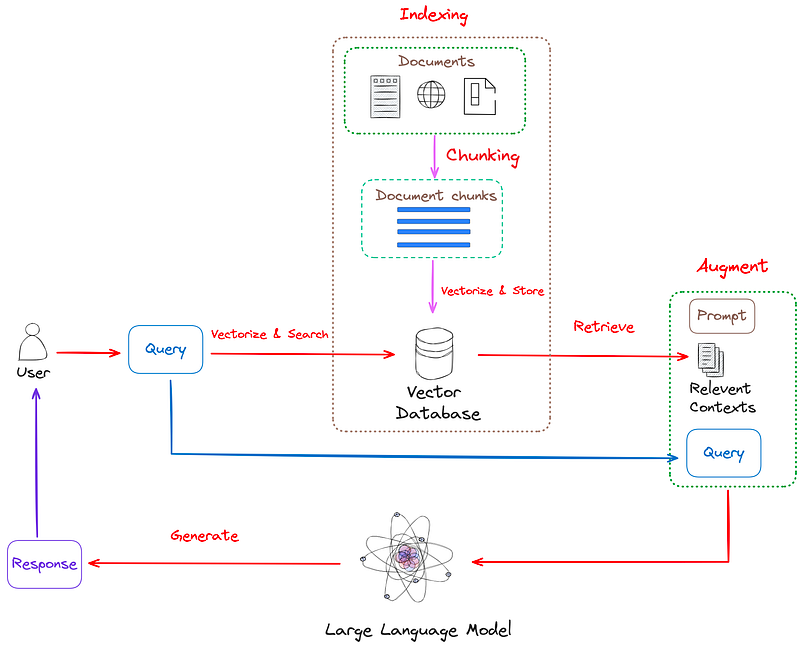
**Hình 1**: Quy trình làm việc điển hình của RAG (Hình minh họa).

**Các bước chính trong quy trình RAG**:

1. **Indexing (Lập chỉ mục)**:
   - Bước đầu tiên này được thực hiện **ngoại tuyến** (offline). Nó bắt đầu với việc làm sạch và trích xuất dữ liệu thô, chuyển đổi các định dạng file khác nhau như PDF, HTML và Word thành văn bản thuần (plain text).
   - Các văn bản này được chia nhỏ thành các đoạn nhỏ hơn, được gọi là **chunking**, để phù hợp với giới hạn ngữ cảnh của mô hình ngôn ngữ.
   - Sau đó, các đoạn này được chuyển đổi thành **biểu diễn vector** thông qua các mô hình nhúng (embedding models).
   - Cuối cùng, một **chỉ mục** được tạo để lưu trữ các đoạn văn bản và vector của chúng dưới dạng cặp **key-value**, giúp tăng cường khả năng tìm kiếm hiệu quả và quy mô lớn.

2. **Retrieval (Truy xuất)**:
   - Truy vấn của người dùng được sử dụng để truy xuất ngữ cảnh liên quan từ các nguồn kiến thức bên ngoài.
   - Để thực hiện điều này, truy vấn người dùng được mã hóa (encoding) thành các vector nhúng có ý nghĩa. Sau đó, một **tìm kiếm theo độ tương tự** được tiến hành trên cơ sở dữ liệu vector để lấy ra **top k đối tượng dữ liệu** gần nhất.

3. **Generation (Tạo nội dung)**:
   - Truy vấn của người dùng cùng với ngữ cảnh đã truy xuất được điền vào một mẫu gợi ý (prompt template).
   - Cuối cùng, **prompt** đã được tăng cường từ bước truy xuất sẽ được đưa vào LLM để tạo ra câu trả lời cuối cùng.

 **Tại sao cần RAG khi đã có LLM?**

Mặc dù **LLM** đã rất mạnh mẽ, nhưng vẫn có những vấn đề mà RAG có thể giải quyết, bao gồm:

- **Vấn đề ảo giác (Hallucination)**: Các mô hình LLM tạo văn bản dựa trên xác suất, do đó nếu thiếu sự hỗ trợ dữ liệu thực tế, chúng có thể tạo ra nội dung có vẻ hợp lý nhưng lại không chính xác.
  
- **Vấn đề thời gian (Timeliness)**: Mô hình càng lớn thì chi phí huấn luyện càng cao và thời gian huấn luyện càng lâu. Do đó, dữ liệu nhạy cảm về thời gian có thể không được cập nhật kịp thời, khiến mô hình không thể trả lời các câu hỏi thời gian thực.
  
- **Vấn đề bảo mật dữ liệu (Data Security)**: Các LLM thông thường không thể truy cập vào dữ liệu nội bộ của doanh nghiệp hoặc dữ liệu riêng tư của người dùng. Giải pháp là lưu trữ dữ liệu cục bộ và thực hiện tất cả các tính toán tại chỗ, chỉ sử dụng LLM trên đám mây để tóm tắt thông tin.
  
- **Vấn đề kiểm soát câu trả lời (Answer Constraint)**: RAG cung cấp nhiều khả năng kiểm soát hơn đối với đầu ra của LLM, đặc biệt khi câu hỏi đòi hỏi kiến thức từ nhiều nguồn khác nhau.

 **Đặc điểm của RAG**

RAG có các đặc điểm nổi bật giúp giải quyết các vấn đề nêu trên:

1. **Scalability (Khả năng mở rộng)**: Giảm kích thước mô hình và chi phí huấn luyện, đồng thời giúp mở rộng kiến thức nhanh chóng.
2. **Accuracy (Độ chính xác)**: Cung cấp câu trả lời dựa trên dữ liệu thực tế, giảm thiểu hiện tượng ảo giác.
3. **Controllability (Khả năng kiểm soát)**: Cho phép cập nhật và tùy chỉnh kiến thức.
4. **Explainability (Khả năng giải thích)**: Thông tin liên quan được truy xuất phục vụ như một tham chiếu cho dự đoán của mô hình.
5. **Versatility (Tính đa dụng)**: RAG có thể được tùy chỉnh cho nhiều nhiệm vụ như Hỏi-Đáp, Tóm tắt, Hội thoại, v.v.

 **Kết luận**

Về mặt hình ảnh, RAG có thể được so sánh với **kỳ thi mở sách** (open-book exam) cho LLM. Giống như một kỳ thi mở sách, nơi sinh viên được phép mang theo tài liệu tham khảo để tìm thông tin cần thiết, RAG cho phép mô hình LLM truy cập vào các nguồn kiến thức bên ngoài để cải thiện khả năng trả lời.

Bài viết này chỉ giới thiệu những kiến thức cơ bản về RAG. Nhiều kỹ thuật tiên tiến về RAG sẽ được giới thiệu trong tương lai.


[advantage RAG](https://readmedium.com/advanced-rag-query-augmentation-for-next-level-search-using-llamaindex-d362fed7ecc3)

xem thêm RAG : [How to Create a RAG Evaluation Dataset From Documents](https://readmedium.com/how-to-create-a-rag-evaluation-dataset-from-documents-140daa3cbe71), [How to Build a Local Open-Source LLM Chatbot With RAG](https://towardsdatascience.com/how-to-build-a-local-open-source-llm-chatbot-with-rag-f01f73e2a131), [Improve Your RAG Context Recall by 95% with an Adapted Embedding Model](https://medium.com/towards-data-science/improve-your-rag-context-recall-by-40-with-an-adapted-embedding-model-5d4a8f583f32), [The best RAG’s technique yet? Anthropic’s Contextual Retrieval and Hybrid Search](https://readmedium.com/the-best-rag-technique-yet-anthropics-contextual-retrieval-and-hybrid-search-62320d99004e)





## Coding example for RAG

In [ ]:
!pip install ragatouille

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.7/86.7 kB 6.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 38.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 74.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 171.5/171.5 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 46.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 32.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 46.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 278.3/278.3 kB 23.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 16.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.2/307.2 kB 20.1 MB/s eta 0:00:00
   ━━━━

In [ ]:
from ragatouille import RAGPretrainedModel

RAG = RAGPretrainedModel.from_pretrained('cobert-ir/colbertv2.0')

KeyboardInterrupt: 